In [79]:
import os
import pandas as pd
import glob
import numpy as np

#display all columns
pd.set_option('display.max_columns', None)

In [3]:
# load in the Code Book excel sheet that includes the feature names for the UCLA Lung Cancer Dataset 
# and their meaning

code_book = pd.read_excel(f'/datasets/Code_book.xlsx')
code_book

,Variable name,Comment
0,hist,Histological type of lung cancer
1,hist_category,Categorical - Histological type of lung cancer
2,stage,TMN staging of lung cancer
3,stage_category,Categorical - TMN staging of lung cancer
4,post_screen_lc_x,Post lung cancer screening lung cancer
5,intervel_ct_hist,Time interval in days between CT exam date and...
6,lungrads,Baseline low-dose CT Lung-RADS score
7,sex,Patient sex
8,race_ethnicity_new,Patient race/ethnicity
9,age_new,Patient age at baseline low-dose CT screening


In [4]:
Comment = code_book.loc[code_book['Variable name'] == 'department_new', 'Comment']
for x in Comment:
    print(x)

Department of referring physician for the baseline low-dose CT screening


In [5]:
# load in the Code Book excel sheet that includes the feature names for the UCLA Lung Cancer Dataset 
# and their meaning

code_book2 = pd.read_excel(f'/datasets/Code_book_UCLA_v20240719.xlsx')
code_book2

,Variable name,Comment
0,hist,Histological type of lung cancer
1,hist_category,Categorical - Histological type of lung cancer
2,stage,TMN staging of lung cancer
3,stage_category,Categorical - TMN staging of lung cancer
4,intervel_ct_hist,Time interval in days between CT exam date and...
5,lungrads,Baseline low-dose CT Lung-RADS score
6,age,Patient age at baseline low-dose CT screening
7,sex,Patient sex
8,bmi,Patient body mass index at baseline screen
9,cancer_hx,Personal history of cancer


In [6]:
# Load in the Lung Cancer Dataset
complete_df = pd.read_excel(r'/workspace/home/Sybil_Feature_Vector_Results.xlsx')

In [8]:
import pickle

# Load Lung Cancer dataframe from file using pickle

with open('/workspace/home/no_duplicates_df.pkl', 'rb') as file:
    no_duplicates_df = pickle.load(file)

In [15]:
#Load in the updated Lung Cancer Dataset

detailed_df = pd.read_excel(r'/datasets/Data_2016_merged_v20240719.xlsx')

In [16]:
detailed_df['race_ethnicity_new'].value_counts()

race_ethnicity_new
White                               4002
Asian                                483
Black                                374
Hispanic                             313
Other                                 49
American Indian or Alaska Native       8
Name: count, dtype: int64

In [17]:
detailed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5436 entries, 0 to 5435
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MRN_h                           5436 non-null   int64  
 1   Acc_num_h                       5436 non-null   int64  
 2   series_uid                      5436 non-null   object 
 3   series_desc                     5436 non-null   object 
 4   hist                            281 non-null    object 
 5   hist_category                   281 non-null    object 
 6   stage                           273 non-null    object 
 7   stage_category                  273 non-null    object 
 8   interval_ct_hist                281 non-null    float64
 9   lungrads                        5289 non-null   object 
 10  age                             5313 non-null   float64
 11  sex                             5313 non-null   object 
 12  bmi                             51

# Determine Scans to Include

In [19]:
#rename column of dataframe

detailed_df = detailed_df.rename(columns={'series_uid': 'SeriesInstanceUID'})

In [26]:
#Drop entries in detailed dataset not included in the other dataset

SeriesInstanceUID2 = no_duplicates_df['SeriesInstanceUID'].tolist()

# Create a boolean mask
mask2 = detailed_df['SeriesInstanceUID'].isin(SeriesInstanceUID2)

# Use the mask to filter the DataFrame and drop rows
complete_detailed_df = detailed_df[mask2]

# Merge datasets on key 'SeriesInstanceUID'

In [36]:
final_merged_df = pd.merge(complete_detailed_df, no_duplicates_df, on='SeriesInstanceUID', how='outer')

In [1130]:
#final_merged_df.info(verbose=True, show_counts= True)

# Create a new column based on whether patient was diagnosed in first year

In [38]:
def is_first_year_diagnosis(x):
    if x <= 365:
        return 1
    return 0

# Create a new column based on whether patient was diagnosed in first year
final_merged_df['First Year Diagnosis'] = final_merged_df['interval_ct_hist_y'].apply(is_first_year_diagnosis)

In [39]:
final_merged_df['First Year Diagnosis'].value_counts()

First Year Diagnosis
0    633
1     17
Name: count, dtype: int64

In [398]:
# save modified dataframe to excel file

merged_data_save_path = r'/workspace/home/Final_Merged_Data.xlsx'

final_merged_df.to_excel(merged_data_save_path, index=False) 

# Data Features Exploration

In [44]:
# sort dataframe by 'AccessionNumber' and reset index 

final_merged_sorted_df = final_merged_df.sort_values(by='AccessionNumber')
final_merged_sorted_df = final_merged_sorted_df.reset_index(drop=True)

In [49]:
# get first year Sybil risk score and add it as a column to dataframe

# Flatten the nested lists
flattened_risk_score = final_merged_sorted_df['Sybil Ensemble Prediction'].apply(lambda x: x[0])

#add first year risk score as column
final_merged_sorted_df['First Year Risk Score'] = flattened_risk_score.tolist()

In [51]:
#make list of features to use in training
#exlude labels and unusable features

#labels
#'hist', 'hist_category', 'stage', 'stage_category', 'intervel_ct_hist'

#exclude 
#'eligibility_final_corrected', 'distance_to_center_new'

#exclude 'post_screen_lc_x' since mostly null

#use 'lungrads_category' instead of 'lungrads'

#use 'AccessionNumber' to identify patient

#use 'Diagnosis' as label?

#remove exam date
training_features_list = ['lungrads_x','age','sex_x','bmi','cancer_hx','fam_hx_lc','copd','race_ethnicity_new_x','insurance_new_x',
                          'education_new_x','lungrads_category_x','eligibility_final_corrected_x','smoking_status_final_corrected_x',
                          'intensity_final_corrected_x','quit_year_final_corrected_x','pk_final_corrected_x','duration_final_corrected_x',
                          'plco_score','comorbid_category_new','median_income_new_x','location_zipcode','last_exam_type_x',
                          'interval_2016_to_last_img_exam_x','nSES_quintile','pct_snap','food_insecurity','pct_preschool','vehicle_access',
                          'pct_poverty_families','pct_poverty_families_under5','pct_poverty_all','pct_poverty_under18','pct_poverty_over65',
                          'pct_eli_all','pct_unemployed','pct_no_computer','pct_no_internet','pct_hh_children','pct_singleadult_hh',
                          'pop_density','total_pop','seniors_alone_pct','pct_foreignborn','pct_not_eng','pct_lep','pct_spanish','pct_asian_lang',
                          'pct_vacant','pct_owner_occupied','pct_renter_occupied','pct_overcrowded','pct_mortgage_burden','pct_rent_burden',
                          'pct_eli_rent_burden','median_rent','pct_eviction_filing_rate','pct_eviction_rate','heatdays','wildfire_pct',
                          'lim_transit_access','retail_foodenv','pct_disabled','arthritis_crudeprev','bphigh_crudeprev','casthma_crudeprev',
                          'chd_crudeprev','copd_crudeprev','diabetes_crudeprev','highchol_crudeprev','kidney_crudeprev','mhlth_crudeprev',
                          'obesity_crudeprev','phlth_crudeprev','stroke_crudeprev','asthmaER_rate','heartattackER_rate','seniors_disabilities',
                          'checkup_crudeprev','dental_crudeprev','bpmed_crudeprev','cholscreen_crudeprev','mammouse_crudeprev','colon_screen_crudeprev',
                          'corem_crudeprev','corew_crudeprev','binge_crudeprev','csmoking_crudeprev','lpa_crudeprev','sleep_crudeprev',
                          'fam_hx_lc_new', 'cci_t0','department_new', 'loc_t0','adi_new'] 

plco_features_list = ['age', 'education_new_x', 'bmi', 'copd', 'race_ethnicity_new_x', 'cancer_hx', 
                      'fam_hx_lc', 'smoking_status_final_corrected_x', 'intensity_final_corrected_x',
                     'duration_final_corrected_x', 'quit_year_final_corrected_x']

In [52]:
training_features_df = final_merged_sorted_df[plco_features_list]

In [281]:
#remove null values

def remove_nan(lst):
    return [x for x in lst if pd.notnull(x)]

In [323]:
# function to get number of unique and null entries per column of dataframe

def get_dataframe_metrics(df):
    # find unique values per column of dataframe
    unique_values = df.apply(lambda x: x.unique())

    # apply function to remove null values from the Series
    unique_values = unique_values.apply(remove_nan)

    # find number of null values per column
    null_value_count = df.isnull().sum()
    
    # find number of unique values per column
    unique_value_count = df.nunique()
    
    # make dataframe of the above values
    feature_count_df = pd.DataFrame({
    'Unique Values': unique_values,
    'Number of Unique Values': unique_value_count,
    'Number of Null Values': null_value_count
    })
    
    # sort dataframe by number of null values and return
    sorted_feature_df = feature_count_df.sort_values(by='Number of Null Values', ascending=False)
    return sorted_feature_df

In [54]:
#find unique values per column
unique_values = training_features_df.apply(lambda x: x.unique())

#remove null values
def remove_nan(lst):
    return [x for x in lst if pd.notnull(x)]

# Apply the function to the Series
unique_values = unique_values.apply(remove_nan)

unique_values

age                                 [73.0, 56.0, 64.0, 51.0, 54.0, 52.0, 66.0, 74....
education_new_x                     [College Graduate, Postgraduate, High school g...
bmi                                 [23.0, 26.0, 36.0, 27.0, 24.0, 31.0, 25.0, 32....
copd                                                                        [No, Yes]
race_ethnicity_new_x                [White, Asian, Hispanic, Black, Other, America...
cancer_hx                                                                   [No, Yes]
fam_hx_lc                                                                   [No, Yes]
smoking_status_final_corrected_x                                    [Former, Current]
intensity_final_corrected_x         [10.0, 20.0, 30.0, 24.0, 11.0, 15.0, 40.0, 16....
duration_final_corrected_x          [40.0, 45.0, 41.0, 30.0, 34.0, 50.0, 25.0, 35....
quit_year_final_corrected_x         [10.0, 0.0, 5.0, 6.0, 11.0, 2.0, 8.0, 12.0, 26...
dtype: object

In [55]:
#find number of null values per column
null_value_count = training_features_df.isnull().sum()

In [56]:
null_value_count

age                                  13
education_new_x                      94
bmi                                  39
copd                                 13
race_ethnicity_new_x                 23
cancer_hx                            13
fam_hx_lc                            13
smoking_status_final_corrected_x     63
intensity_final_corrected_x         113
duration_final_corrected_x          116
quit_year_final_corrected_x          65
dtype: int64

In [57]:
null_value_count.size

11

In [59]:
#find number of unique values per column
unique_value_count = training_features_df.nunique()

In [60]:
unique_value_count

age                                 47
education_new_x                      6
bmi                                 33
copd                                 2
race_ethnicity_new_x                 6
cancer_hx                            2
fam_hx_lc                            2
smoking_status_final_corrected_x     2
intensity_final_corrected_x         24
duration_final_corrected_x          59
quit_year_final_corrected_x         53
dtype: int64

In [61]:
feature_count_df = pd.DataFrame({
    'Unique Values': unique_values,
    'Number of Unique Values': unique_value_count,
    'Number of Null Values': null_value_count
})
feature_count_df.head(50)

,Unique Values,Number of Unique Values,Number of Null Values
age,"[73.0, 56.0, 64.0, 51.0, 54.0, 52.0, 66.0, 74....",47,13
education_new_x,"[College Graduate, Postgraduate, High school g...",6,94
bmi,"[23.0, 26.0, 36.0, 27.0, 24.0, 31.0, 25.0, 32....",33,39
copd,"[No, Yes]",2,13
race_ethnicity_new_x,"[White, Asian, Hispanic, Black, Other, America...",6,23
cancer_hx,"[No, Yes]",2,13
fam_hx_lc,"[No, Yes]",2,13
smoking_status_final_corrected_x,"[Former, Current]",2,63
intensity_final_corrected_x,"[10.0, 20.0, 30.0, 24.0, 11.0, 15.0, 40.0, 16....",24,113
duration_final_corrected_x,"[40.0, 45.0, 41.0, 30.0, 34.0, 50.0, 25.0, 35....",59,116


In [62]:
sorted_feature_df = feature_count_df.sort_values(by='Number of Null Values', ascending=False)
sorted_feature_df.head(10)

,Unique Values,Number of Unique Values,Number of Null Values
duration_final_corrected_x,"[40.0, 45.0, 41.0, 30.0, 34.0, 50.0, 25.0, 35....",59,116
intensity_final_corrected_x,"[10.0, 20.0, 30.0, 24.0, 11.0, 15.0, 40.0, 16....",24,113
education_new_x,"[College Graduate, Postgraduate, High school g...",6,94
quit_year_final_corrected_x,"[10.0, 0.0, 5.0, 6.0, 11.0, 2.0, 8.0, 12.0, 26...",53,65
smoking_status_final_corrected_x,"[Former, Current]",2,63
bmi,"[23.0, 26.0, 36.0, 27.0, 24.0, 31.0, 25.0, 32....",33,39
race_ethnicity_new_x,"[White, Asian, Hispanic, Black, Other, America...",6,23
age,"[73.0, 56.0, 64.0, 51.0, 54.0, 52.0, 66.0, 74....",47,13
copd,"[No, Yes]",2,13
cancer_hx,"[No, Yes]",2,13


In [289]:
# function to print percentage of null values in a dataframe  

def get_dataframe_null_metrics(df):
    # Count the total number of null values in DataFrame
    total_nulls = df.isnull().sum().sum()

    # Print the result
    print(f"Total number of null values in the Features DataFrame: {total_nulls}")
    
    # Total number of entries in DataFrame
    total_entries = df.size

    # Print the result
    print(f"Total number of entries in the Features DataFrame: {total_entries}")
    
    # Percentage of null entries
    per_null = total_nulls/total_entries
    formatted_percent = f"{per_null:.2%}"

    print(f"Percentage of entries with a null value: {formatted_percent}")
    
    # Count the number of rows with at least one null value
    rows_with_nulls = df.isnull().any(axis=1).sum()

    # Print the result
    print(f"Number of rows with at least one null value: {rows_with_nulls}")

In [63]:
# Count the total number of null values in DataFrame
total_nulls = training_features_df.isnull().sum().sum()

# Print the result
print(f"Total number of null values in the Features DataFrame: {total_nulls}")

Total number of null values in the Features DataFrame: 565


In [64]:
# Total number of entries in DataFrame
total_entries = training_features_df.size

# Print the result
print(f"Total number of entries in the Features DataFrame: {total_entries}")

Total number of entries in the Features DataFrame: 7150


In [65]:
# Percentage of null entries
per_null = total_nulls/total_entries
formatted_percent = f"{per_null:.2%}"

print(f"Percentage of entries with a null value: {formatted_percent}")

Percentage of entries with a null value: 7.90%


In [66]:
# Count the number of rows with at least one null value
rows_with_nulls = training_features_df.isnull().any(axis=1).sum()

# Print the result
print(f"Number of rows with at least one null value: {rows_with_nulls}")

Number of rows with at least one null value: 193


In [67]:
training_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               637 non-null    float64
 1   education_new_x                   556 non-null    object 
 2   bmi                               611 non-null    float64
 3   copd                              637 non-null    object 
 4   race_ethnicity_new_x              627 non-null    object 
 5   cancer_hx                         637 non-null    object 
 6   fam_hx_lc                         637 non-null    object 
 7   smoking_status_final_corrected_x  587 non-null    object 
 8   intensity_final_corrected_x       537 non-null    float64
 9   duration_final_corrected_x        534 non-null    float64
 10  quit_year_final_corrected_x       585 non-null    float64
dtypes: float64(5), object(6)
memory usage: 56.0+ KB


In [68]:
training_features_df['race_ethnicity_new_x'].unique()

array(['White', 'Asian', 'Hispanic', nan, 'Black', 'Other',
       'American Indian or Alaska Native'], dtype=object)

In [69]:
training_features_df.describe()

,age,bmi,intensity_final_corrected_x,duration_final_corrected_x,quit_year_final_corrected_x
count,637.000000,611.000000,537.000000,534.000000,585.000000
mean,65.552590,26.008183,20.915456,38.188202,6.454860
std,7.825885,5.108488,9.694063,12.033126,10.678992
min,18.000000,15.000000,1.000000,2.000000,0.000000
25%,61.000000,23.000000,16.000000,30.000000,0.000000
50%,66.000000,26.000000,20.000000,40.000000,1.000000
75%,70.000000,28.000000,20.000000,47.000000,9.000000
max,99.000000,48.000000,80.000000,80.000000,56.000000


# Calculating PLCO Score

In [70]:
def get_education_as_num(edu_level):
    return ['Less than high school graduate', 'High school graduate or GED', 'Some training after high school',
           'Some college or technical school', 'College Graduate', 'Postgraduate'].index(edu_level) + 1

In [71]:
def get_plco_ethnicity_value(ethnicity):
    eth_dic = {
        'Black': 0.3944778,
        'Hispanic': -0.7434744,
        'Asian': -0.466585,
        'American Indian or Alaska Native': 1.027152,
        'White': 0,
        'Other': 0
    }
    
    return eth_dic[ethnicity]

In [72]:
def get_plco_ethnicity_value_2014(ethnicity):
    eth_dic = {
        'Black': 0.3213965,
        'Hispanic': -0.8202554,
        'Asian': -0.5240639,
        'American Indian or Alaska Native': 0.9521109,
        'White': 0,
        'Other': 0
    }
    
    return eth_dic[ethnicity]

In [73]:
def has_nan_values(row):
    return (
            pd.isna(row['age']) or pd.isna(row['education_new_x']) or pd.isna(row['bmi']) or 
            pd.isna(row['copd']) or pd.isna(row['race_ethnicity_new_x']) or
            pd.isna(row['cancer_hx']) or pd.isna(row['fam_hx_lc']) or
            pd.isna(row['smoking_status_final_corrected_x']) or pd.isna(row['intensity_final_corrected_x']) or
            pd.isna(row['duration_final_corrected_x']) or pd.isna(row['quit_year_final_corrected_x'])
           )

In [74]:
def get_numeric_from_yes_no(row):
    if row.lower() == 'yes' or row.lower() == 'current':
        return 1
    else: 
        return 0

In [75]:
def get_smoking_status_value(row):
    if row == 'Current':
        return 2.310767
    else:
        return 2.890119

In [76]:
import math 
def calculate_plco_2012(row):
    if has_nan_values(row):
        return np.nan
    else:
        logit = (-4.532506 + 0.0778868*(row['age'] - 62) - 
                 0.0812744*(get_education_as_num(row['education_new_x'])-4) -
                 0.0274194*(row['bmi']-27) +
                 0.3553063*get_numeric_from_yes_no(row['copd']) +
                 get_plco_ethnicity_value(row['race_ethnicity_new_x']) +
                 0.4589971*get_numeric_from_yes_no(row['cancer_hx']) +
                 0.587185*get_numeric_from_yes_no(row['fam_hx_lc']) +
                 0.2597431*(get_numeric_from_yes_no(row['smoking_status_final_corrected_x'])-1) -
                 1.822606*((row['intensity_final_corrected_x']/10.0)**(-1) - 0.4021541613) -
                 0.0317321*(row['duration_final_corrected_x']-27) -
                 0.0308572*(row['quit_year_final_corrected_x']-10)
                )
        return np.exp(logit)/(1 + np.exp(logit))

In [77]:
import math 
def calculate_plco_2014(row):
    if has_nan_values(row):
        return np.nan
    else:
        logit = (-6.84088 + 0.0796252*(row['age'] - 62) - 
                 (0.0879622*(get_education_as_num(row['education_new_x'])-4)) -
                 (0.0289916*(row['bmi']-27)) +
                 0.3454183*get_numeric_from_yes_no(row['copd']) +
                 get_plco_ethnicity_value_2014(row['race_ethnicity_new_x']) +
                 0.4845352*get_numeric_from_yes_no(row['cancer_hx']) +
                 0.5857166*get_numeric_from_yes_no(row['fam_hx_lc']) +
                 get_smoking_status_value(row['smoking_status_final_corrected_x']) -
                 0.1868627*(((row['intensity_final_corrected_x'] +0.25)/10.0)**(-1) - 4.0) -
                 0.0305386*(row['duration_final_corrected_x']-27) -
                 0.0321588*(row['quit_year_final_corrected_x']-10)
                )
        return np.exp(logit)/(1 + np.exp(logit))

# Data Preperation

In [159]:
def perform_data_preprocessing(feature_list):
    training_df = final_merged_sorted_df[feature_list]

    #deal with null values
    
    #get columns with numerical values
    numerical_cols = training_df.select_dtypes(include=['number']).columns
    
    # Replace null values with mean of each numerical column
    training_df[numerical_cols] = training_df[numerical_cols].fillna(training_df[numerical_cols].mean())
    
    #get columns with categorical values
    categorical_cols = training_df.select_dtypes(exclude=['number']).columns
    
    # Replace null values with mode of each categorical column
    training_df[categorical_cols] = training_df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))
    
    #perform one-hot encoding on categorical data
    training_df = pd.get_dummies(training_df, columns=categorical_cols)
    
    #cast boolean values to 1/0
    training_df = training_df.astype(int)
    
    return training_df

# Initial Machine Learning Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

## ML Training Functions

In [83]:
def train_model(X_set, y_set, pipe, param_dic):
    
    # Split data into 80% training and 20% testing while maintaining class balance
    X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size=0.2, random_state = 42, stratify=y)

    # Use StratifiedKFold to ensure an even split regarding classes
    cv = StratifiedKFold(n_splits=5)

    # Perform cross-validation
    grid = GridSearchCV(pipe, param_dic, cv=cv, scoring='roc_auc')
    grid.fit(X_train, y_train)
    
    roc_score, auprc = evaluate_model(grid, X_test, y_test)
    
    return grid, roc_score, auprc

In [84]:
def evaluate_model(trained_model, X_test_set, y_test_set):
    # Use the best estimator found by GridSearchCV
    best_model = trained_model.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict_proba(X_test_set)[:,1]
    y_pred2 = best_model.predict(X_test_set)

    print("The predicted labels are: \n", y_pred2)
    print("The actual labels are: \n", y_test_set.tolist())
    
    # Calculate accuracy
    roc_score = roc_auc_score(y_test_set, y_pred)

    # Calculate precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test_set, y_pred)

    # Calculate AUPRC
    auprc = auc(recall, precision)
    
    return roc_score, auprc

In [100]:
def print_model_scores(best_model, roc_score, auprc):
    print("The best AUC score:", best_model.best_score_)
    print("was achieved with the parameters:", best_model.best_params_)  
    print(f'On the test set, the model achieved an AUC of: {roc_score}')
    print(f'On the test set, the model achieved an AUPRC of: {auprc}')    

In [861]:
def make_chart_from_dic(score_dic):
    # Make dataframe from dictionary 
    per_df = pd.DataFrame.from_dict(score_dic)

    # Separate the DataFrame into two DataFrames, one for each metric
    metric_0 = per_df.iloc[0:1, :]  # First metric (index 0)
    metric_1 = per_df.iloc[1:2, :]  # Second metric (index 1)

    # Transpose the DataFrames for plotting
    metric_0_transposed = metric_0.T
    metric_1_transposed = metric_1.T   
    
    # Plot the first metric
    ax1 = metric_0_transposed.plot(kind='bar', figsize=(6, 3), legend=False)
    ax1.set_title('Model Performance: AUC')
    ax1.set_xlabel('Models')
    ax1.set_ylabel('AUC Score')
    plt.xticks(rotation=0, fontsize=8)  # Rotate x-axis labels to horizontal
    
    # Adjust y-axis limits to add more space above the bars
    ax1.set_ylim(0, metric_0.max().max() * 1.2)
    
    # Add values on top of each bar with padding
    for p in ax1.patches:
        ax1.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', xytext=(0, 8), textcoords='offset points', fontsize=8)

    # Plot the second metric
    ax2 = metric_1_transposed.plot(kind='bar', figsize=(6, 3), legend=False)
    ax2.set_title('Model Performance: AUPRC')
    ax2.set_xlabel('Models')
    ax2.set_ylabel('AUPRC Score')
    plt.xticks(rotation=0, fontsize=8)  # Rotate x-axis labels to horizontal
    
    # Adjust y-axis limits to add more space above the bars
    ax2.set_ylim(0, metric_1.max().max() * 1.2)
    
    # Add values on top of each bar with padding
    for p in ax2.patches:
        ax2.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=8)


    # Show the plots
    plt.tight_layout()
    plt.show()  

## Sybil Risk Score AUC and AUPRC

In [86]:
# Predict on the test set
y_pred_sybil = final_merged_sorted_df['First Year Risk Score']
y_test_sybil  = final_merged_sorted_df['First Year Diagnosis']

# Calculate accuracy
roc_score_sybil  = roc_auc_score(y_test_sybil , y_pred_sybil )

# Calculate precision-recall curve
precision_sybil , recall_sybil, _ = precision_recall_curve(y_test_sybil , y_pred_sybil )

# Calculate AUPRC
auprc_sybil  = auc(recall_sybil , precision_sybil )
    

print("Sybil achieved a first year AUC of:", roc_score_sybil )
print("Sybil achieved a first year AUPRC of:", auprc_sybil )

Sybil achieved a first year AUC of: 0.9026577455626801
Sybil achieved a first year AUPRC of: 0.3775878523938477


In [1173]:
# Predict on the test set
y_pred_sybil_test = ucla_sybil_training_df['First Year Risk Score']
y_test_sybil_test  = ucla_sybil_training_df['first_year_diagnosis']

# Calculate accuracy
roc_score_sybil_test  = roc_auc_score(y_test_sybil_test, y_pred_sybil_test )

# Calculate precision-recall curve
precision_sybil_test , recall_sybil_test, _ = precision_recall_curve(y_test_sybil , y_pred_sybil )

# Calculate AUPRC
auprc_sybil_test  = auc(recall_sybil_test , precision_sybil_test )
    

print("Sybil achieved a first year AUC of:", roc_score_sybil_test)
print("Sybil achieved a first year AUPRC of:", auprc_sybil_test )

Sybil achieved a first year AUC of: 0.9026577455626801
Sybil achieved a first year AUPRC of: 0.3775878523938477


In [1170]:
ucla_sybil_training_df.head(2)

,MRN_h_x,Acc_num_h_x,SeriesInstanceUID,series_desc_x,hist_x,hist_category_x,stage_x,stage_category_x,interval_ct_hist_x,lungrads_x,age,sex_x,BMI,cancer_history,family_cancer_history,diagcopd,race,insurance_new_x,education,lungrads_category_x,eligibility_final_corrected_x,cigsmok,smokeday,years_since_quiting_smoking,pk_final_corrected_x,smokeyr,plco_score,comorbid_category_new,median_income_new_x,location_zipcode,last_exam_type_x,interval_2016_to_last_img_exam_x,nSES_quintile,pct_snap,food_insecurity,pct_preschool,vehicle_access,pct_poverty_families,pct_poverty_families_under5,pct_poverty_all,pct_poverty_under18,pct_poverty_over65,pct_eli_all,pct_unemployed,pct_no_computer,pct_no_internet,pct_hh_children,pct_singleadult_hh,pop_density,total_pop,seniors_alone_pct,pct_foreignborn,pct_not_eng,pct_lep,pct_spanish,pct_asian_lang,pct_vacant,pct_owner_occupied,pct_renter_occupied,pct_overcrowded,pct_mortgage_burden,pct_rent_burden,pct_eli_rent_burden,median_rent,pct_eviction_filing_rate,pct_eviction_rate,heatdays,wildfire_pct,lim_transit_access,retail_foodenv,pct_disabled,arthritis_crudeprev,bphigh_crudeprev,casthma_crudeprev,chd_crudeprev,copd_crudeprev,diabetes_crudeprev,highchol_crudeprev,kidney_crudeprev,mhlth_crudeprev,obesity_crudeprev,phlth_crudeprev,stroke_crudeprev,asthmaER_rate,heartattackER_rate,seniors_disabilities,checkup_crudeprev,dental_crudeprev,bpmed_crudeprev,cholscreen_crudeprev,mammouse_crudeprev,colon_screen_crudeprev,corem_crudeprev,corew_crudeprev,binge_crudeprev,csmoking_crudeprev,lpa_crudeprev,sleep_crudeprev,AccessionNumber,Diacom Directory,Unnamed: 0,MRN_h_y,Acc_num_h_y,exam_date,series_desc_y,hist_y,hist_category_y,stage_y,stage_category_y,post_screen_lc_x,interval_ct_hist_y,lungrads_y,sex_y,race_ethnicity_new_y,age_new,insurance_new_y,education_new_y,lungrads_category_y,post_screen_lc_y,eligibility_final_corrected_y,smoking_status_final_corrected_y,intensity_final_corrected_y,quit_year_final_corrected_y,pk_final_corrected_y,duration_final_corrected_y,fam_hx_lc_new,cci_t0,department_new,loc_t0,median_income_new_y,adi_new,distance_to_center_new,last_exam_type_y,interval_2016_to_last_img_exam_y,Diagnosis,interval_ct_hist_as_year,last_exam_as_year,Day of Diagnosis,Year of Diagnosis,Feature Vector,Sybil 1 Prediction,Sybil 2 Prediction,Sybil 3 Prediction,Sybil 4 Prediction,Sybil 5 Prediction,Sybil Ensemble Prediction,first_year_diagnosis,First Year Risk Score,interval_2016_to_last_img_exam,most_recent_scan,age_at_last_screening
0,2460458378,1005053246,1.3.12.2.1107.5.1.4.51964.30000016050615572117...,Chest low dose 1.0 B50f,NaN,NaN,NaN,NaN,NaN,2,73.0,Male,23.0,0.0,0.0,0.0,White,Medicare/Medicaid,College Graduate,1-2,Newly eligible,0.0,10.0,10.0,20.0,40.0,1.306628,2-3,75717.0,90404.0,Lung Screening LDCT,1088.0,5.0,3.3,14.6,82.1,8.8,5.6,5.7,9.7,6.2,12.7,15.5,3.3,4.8,7.5,18.4,45.8,3984.1,28084.0,38.8,19.5,25.1,6.1,11.3,4.5,8.4,34.5,65.5,1.8,7.4,17.7,10.6,1735.0,0.7,0.7,9.5,0.0,0.129093,88.757163,8.0,18.1,22.8,8.1,4.1,4.1,7.4,30.9,2.3,10.6,22.3,9.2,2.2,32.65,11.42,27.9,71.6,75.4,67.1,84.6,80.4,73.4,38.2,33.9,19.8,9.2,13.0,32.0,1005053246,/datasets/1005053246/Chest low dose 1.0 B50f,4411,2460458378,1005053246,2016-05-06,Chest low dose 1.0 B50f,NaN,NaN,NaN,NaN,NaN,NaN,2,Male,White,>=65,Medicare/Medicaid,College Graduate,1-2,NaN,Newly eligible,Former,10.0,10.0,20.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lung Screening LDCT,1088.0,0,NaN,2,1088.0,2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.002614143679095454, 0.012768073747244868, 0...","[0.024149747974363135, 0.0397637904643146, 0.0...","[0.0006226553737865955, 0.005167619556337853, ...","[0.002791824858990207, 0.009865956692336473, 0...","[0.013722923177036656, 0.03525246525107287, 0....","[0.010900917281180979, 0.02014553619432984, 0....",0,0.010901,1088.0,1088.0,75.0
1,2467550964,1005692582,1.3.12.2.1107.5.1.4.64297.30000016100615481865...,Chest 1.0 B45f,NaN,NaN,NaN,NaN,NaN,2,56.0,Female,23.0,0.0,1.0,0.0,White,Private or Commercial,College Graduate,1-2,Eligib

## PLCO Features

The list of PLCO features is named "plco_features_list" 

In [122]:
plco_dic = {}

#X = perform_data_preprocessing(plco_features_list)
X = final_merged_sorted_df[plco_features_list]
y = final_merged_sorted_df['First Year Diagnosis']

In [117]:
# Define the numerical and categorical features
numerical_cols = X[plco_features_list].select_dtypes(include=['number']).columns  
categorical_cols = X[plco_features_list].select_dtypes(exclude=['number']).columns  


# Define the pipeline for PCA on numerical features and imputation for missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler())
        ]), numerical_cols),  # Apply imputer and scaler to  numerical features
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)  # Apply imputer and one-hot-encoding to categorical features
    ]
)

### Logistic Regression

In [118]:
# Create a pipeline that first scales the data then trains the model
pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(solver='liblinear'))
])

#specify parameter values to search
params_lr = {}
params_lr['logreg__C'] = [0.1, 1, 10]
params_lr['logreg__penalty'] = ['l1', 'l2']

In [123]:
best_log_reg_model, roc_score_lr, auprc_lr = train_model(X, y, pipe_lr, params_lr)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [124]:
print_model_scores(best_log_reg_model, roc_score_lr, auprc_lr)

The best AUC score: 0.6442050087361677
was achieved with the parameters: {'logreg__C': 10, 'logreg__penalty': 'l1'}
On the test set, the model achieved an AUC of: 0.43175853018372695
On the test set, the model achieved an AUPRC of: 0.020171579590426883


In [125]:
plco_dic["Logistic Regression"] = [roc_score_lr, auprc_lr]

### Random Forest

In [126]:
# Create a pipeline that first scales the data then trains the model
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('randfor', RandomForestClassifier())
])

#specify parameter values to search
params_rf = {}
params_rf['randfor__n_estimators'] = [10, 100, 500]
params_rf['randfor__max_features'] = [2, 4, 6, 8, 10]

In [127]:
best_rand_for_model, roc_score_rf, auprc_rf = train_model(X, y, pipe_rf, params_rf)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [128]:
print_model_scores(best_rand_for_model, roc_score_rf, auprc_rf)

The best AUC score: 0.762284022519899
was achieved with the parameters: {'randfor__max_features': 4, 'randfor__n_estimators': 500}
On the test set, the model achieved an AUC of: 0.31364829396325455
On the test set, the model achieved an AUPRC of: 0.014881547024404168


In [129]:
plco_dic["Random Forest"] = [roc_score_rf, auprc_rf]

### XGBoost

In [130]:
# Create a pipeline that first scales the data then trains the model
pipe_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBClassifier())
])

#specify parameter values to search
params_xgb = {}
params_xgb['xgb__max_depth'] = [10, 25, 50]
params_xgb['xgb__n_estimators'] = [10, 30, 50, 70]

In [2047]:
best_xgboost_model, roc_score_xgb, auprc_xgb = train_model(X, y, pipe_xgb, params_xgb)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2048]:
print_model_scores(best_xgboost_model, roc_score_xgb, auprc_xgb)

The best AUC score: 0.7326975344593283
was achieved with the parameters: {'xgb__max_depth': 10, 'xgb__n_estimators': 10}
On the test set, the model achieved an AUC of: 0.3595800524934383
On the test set, the model achieved an AUPRC of: 0.016070253775171812


In [2049]:
plco_dic["XGBoost"] = [roc_score_xgb, auprc_xgb]

### SVC

In [131]:
# Create a pipeline that first scales the data then trains the model
pipe_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC(probability = True))
])

#specify parameter values to search
params_svc = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__degree': [2, 3, 4],
    'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'svc__coef0': [0.0, 0.1, 0.5, 1],
    'svc__class_weight': [None, 'balanced']
}

In [2051]:
best_svc_model, roc_score_svc, auprc_svc = train_model(X, y, pipe_svc, params_svc)

The predicted labels are: 
 [0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1
 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1
 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2052]:
print_model_scores(best_svc_model, roc_score_svc, auprc_svc)

The best AUC score: 0.8030188312948943
was achieved with the parameters: {'svc__C': 10, 'svc__class_weight': 'balanced', 'svc__coef0': 1, 'svc__degree': 2, 'svc__gamma': 0.1, 'svc__kernel': 'sigmoid'}
On the test set, the model achieved an AUC of: 0.5144356955380577
On the test set, the model achieved an AUPRC of: 0.02277955319013924


In [2053]:
plco_dic["SVC"] = [roc_score_svc, auprc_svc]

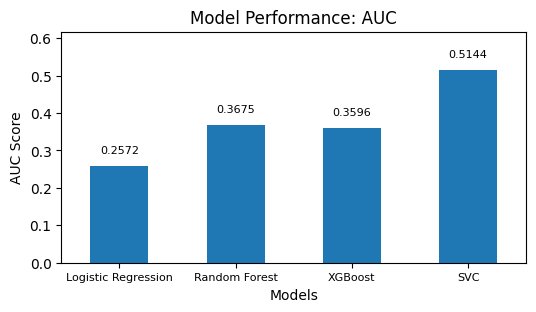

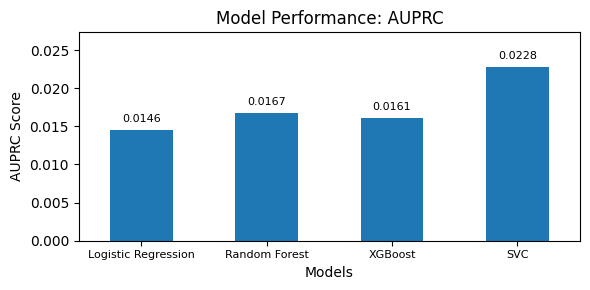

In [2054]:
make_chart_from_dic(plco_dic)

## Geographic Features

The list of geographic features is named "training_features_list"

In [133]:
geo_dic = {}
X = final_merged_sorted_df[training_features_list]
y = final_merged_sorted_df['First Year Diagnosis']

In [134]:
# Define the numerical and categorical features
numerical_cols = X[training_features_list].select_dtypes(include=['number']).columns  
categorical_cols = X[training_features_list].select_dtypes(exclude=['number']).columns  


# Define the pipeline for PCA on numerical features and imputation for missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler())
        ]), numerical_cols),  # Apply imputer and scaler to  numerical features
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)  # Apply imputer and one-hot-encoding to categorical features
    ]
)

### Logistic Regression

In [135]:
# Create a pipeline that first scales the data then trains the model
pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(solver = 'liblinear'))
])

#specify parameter values to search
params_lr = {}
params_lr['logreg__C'] = [0.1, 1, 10]
params_lr['logreg__penalty'] = ['l1', 'l2']

In [136]:
best_log_reg_model_geo, roc_score_lr_geo, auprc_lr_geo = train_model(X, y, pipe_lr, params_lr)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [137]:
print_model_scores(best_log_reg_model_geo, roc_score_lr_geo, auprc_lr_geo)

The best AUC score: 0.9462434478741992
was achieved with the parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l1'}
On the test set, the model achieved an AUC of: 0.8937007874015748
On the test set, the model achieved an AUPRC of: 0.4243881118881119


In [138]:
geo_dic["Logistic Regression"] = [roc_score_lr_geo, auprc_lr_geo]

### Random Forest

In [139]:
# Create a pipeline that first scales the data then trains the model
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('randfor', RandomForestClassifier())
])

#specify parameter values to search
params_rf = {}
params_rf['randfor__n_estimators'] = [10, 100, 500]
params_rf['randfor__max_features'] = [2, 4, 6, 8, 10]

In [140]:
best_rand_for_model_geo, roc_score_rf_geo, auprc_rf_geo = train_model(X, y, pipe_rf, params_rf)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [141]:
print_model_scores(best_rand_for_model_geo, roc_score_rf_geo, auprc_rf_geo)

The best AUC score: 0.8971655989128324
was achieved with the parameters: {'randfor__max_features': 8, 'randfor__n_estimators': 500}
On the test set, the model achieved an AUC of: 0.7388451443569554
On the test set, the model achieved an AUPRC of: 0.1585978835978836


In [142]:
geo_dic["Random Forest"] = [roc_score_rf_geo, auprc_rf_geo]

### XGBoost

In [143]:
# Create a pipeline that first scales the data then trains the model
pipe_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBClassifier())
])

#specify parameter values to search
params_xgb = {}
params_xgb['xgb__max_depth'] = [10, 25, 50]
params_xgb['xgb__n_estimators'] = [10, 30, 50, 70]

In [2116]:
best_xgboost_model_geo, roc_score_xgb_geo, auprc_xgb_geo = train_model(X, y, pipe_xgb, params_xgb)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2117]:
print_model_scores(best_xgboost_model_geo, roc_score_xgb_geo, auprc_xgb_geo)

The best AUC score: 0.9591147350029121
was achieved with the parameters: {'xgb__max_depth': 10, 'xgb__n_estimators': 10}
On the test set, the model achieved an AUC of: 0.8320209973753281
On the test set, the model achieved an AUPRC of: 0.0873784473138849


In [2118]:
geo_dic["XGBoost"] = [roc_score_xgb_geo, auprc_xgb_geo]

### SVC

In [144]:
# Create a pipeline that first scales the data then trains the model
pipe_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC(probability = True))
])

#specify parameter values to search
params_svc = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__degree': [2, 3, 4],
    'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'svc__coef0': [0.0, 0.1, 0.5, 1],
    'svc__class_weight': [None, 'balanced']
}

In [2120]:
best_svc_model_geo, roc_score_svc_geo, auprc_svc_geo = train_model(X, y, pipe_svc, params_svc)

The predicted labels are: 
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2121]:
print_model_scores(best_svc_model_geo, roc_score_svc_geo, auprc_svc_geo)

The best AUC score: 0.9531547272374297
was achieved with the parameters: {'svc__C': 1, 'svc__class_weight': 'balanced', 'svc__coef0': 1, 'svc__degree': 2, 'svc__gamma': 0.01, 'svc__kernel': 'sigmoid'}
On the test set, the model achieved an AUC of: 0.9186351706036746
On the test set, the model achieved an AUPRC of: 0.14962759462759462


In [2122]:
geo_dic["SVC"] = [roc_score_svc_geo, auprc_svc_geo]

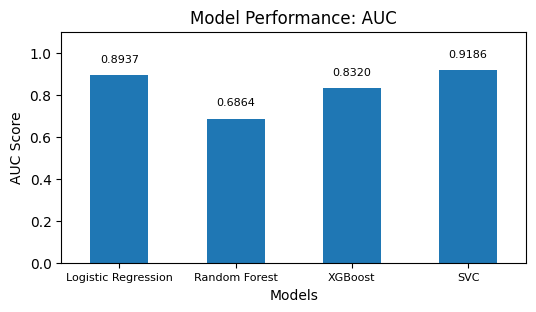

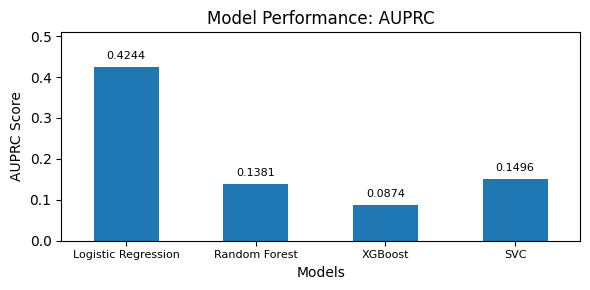

In [2123]:
make_chart_from_dic(geo_dic)

# Incorporating Image Features

In [1022]:
# Flatten the nested lists
flattened_data = ucla_sybil_training_df['Feature Vector'].apply(lambda x: x[0])

# Convert the flattened data into a DataFrame with separate columns
flat_feature_vector_df = pd.DataFrame(flattened_data.tolist(), index=no_duplicates_df.index)

In [1037]:
flat_feature_vector_df = flat_feature_vector_df.reset_index(drop=True)

In [1038]:
flat_feature_vector_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.442415,0.979458,1.382697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.051218,0.0,0.0,0.0,0.0,0.189137,1.459538,0.0,0.0,0.0,0.0,0.0,0.412745,0.001249,0.0,0.0,2.096575,0.769951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.352385,0.0,0.0,0.0,0.0,0.0,0.0,0.024827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057056,0.0,0.0,0.196253,0.0,0.0,0.0,0.0,0.0,0.722017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.956508,0.156563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.410805,0.126946,0.0,0.0,0.670663,0.0,0.0,0.0,0.547078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.592713,0.0,0.0,1.992249,0.0,0.163242,0.084249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.824294,0.0,0.0,0.003827,0.0,0.0,1.813190,0.0,1.522237,0.0,0.0,0.0,0.0,0.044113,0.657951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.315002,0.0,0.462915,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.859291,0.0,0.0,0.0,0.273500,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.594694,0.00000,0.0,0.0,0.0,0.0,0.884500,0.841249,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.531059,0.0,0.0,0.0,3.091310,1.943601,1.481433,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056373,0.0,0.008687,0.0,2.911451,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.178903,0.0,0.755051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014329,0.0,1.583588,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021077,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.879954,0.0,0.024792,1.531866,0.0,1.693264,1.028351,0.0,0.0,0.0,2.502298,0.0,0.0,0.0,2.085796,0.201506,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.125832,0.0,0.0,1.054716,2.068297,0.646200,0.0,0.0,0.0,0.0,1.415864,0.0,0.875038,0.0,0.0,0.000309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.852592,0.0,0.0,1.811659,0.0,0.0,0.0,0.0,0.0,0.888630,2.446887,0.631063,0.0,0.0,0.000000,0.458661,2.123301,0.0,0.0,0.0,1.247021,0.0,0.0,0.0,0.0,0.0,2.207825,0.0,0.621598,0.0,0.0,0.041443,0.155480,2.393792,0.0,0.663106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.872007,0.847052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.129184,0.0,0.0,0.0,0.0,0.0,0.004168,0.168297,0.0,0.0,0.0,0

In [89]:
# Check if all values in each column are zero
zero_columns = (flat_feature_vector_df == 0).all()

# Filter columns that are all zeros
all_zero_columns = zero_columns[zero_columns].index.tolist()

# Display the result
print(f'Columns with all zeros: {all_zero_columns}')
print("The number of columns with all 0s", len(all_zero_columns))

Columns with all zeros: [0, 1, 3, 4, 5, 6, 7, 8, 12, 13, 15, 16, 18, 20, 21, 23, 24, 25, 26, 29, 31, 32, 33, 36, 37, 42, 44, 45, 46, 50, 51, 52, 53, 56, 57, 58, 60, 61, 63, 64, 66, 67, 68, 70, 72, 73, 74, 75, 78, 79, 80, 83, 84, 85, 87, 88, 89, 90, 93, 94, 96, 97, 100, 101, 103, 104, 105, 106, 108, 109, 115, 116, 117, 118, 119, 120, 121, 123, 124, 126, 127, 129, 131, 132, 133, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 159, 161, 162, 163, 165, 166, 169, 170, 174, 175, 176, 178, 179, 180, 181, 184, 187, 188, 189, 190, 195, 196, 197, 199, 200, 201, 202, 203, 204, 207, 208, 209, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 227, 229, 231, 233, 235, 238, 239, 240, 242, 243, 244, 247, 249, 250, 251, 252, 253, 254, 255, 261, 263, 264, 265, 266, 267, 268, 270, 272, 273, 274, 275, 276, 277, 279, 282, 287, 289, 290, 291, 294, 295, 298, 300, 302, 303, 304, 305, 309, 313, 314, 315, 316, 318, 320, 321, 323, 325, 328, 329, 330, 

In [90]:
# Remove columns that contain only zeros
flat_feature_vector_non_zero = flat_feature_vector_df.loc[:, (flat_feature_vector_df != 0).any(axis=0)]
flat_feature_vector_non_zero

,2,9,10,11,14,17,19,22,27,28,30,34,35,38,39,40,41,43,47,48,49,54,55,59,62,65,69,71,76,77,81,82,86,91,92,95,98,99,102,107,110,111,112,113,114,122,125,128,130,134,135,136,149,158,160,164,167,168,171,172,173,177,182,183,185,186,191,192,193,194,198,205,206,210,211,212,213,225,228,230,232,234,236,237,241,245,246,248,256,257,258,259,260,262,269,271,278,280,281,283,284,285,286,288,292,293,296,297,299,301,306,307,308,310,311,312,317,319,322,324,326,327,331,334,337,340,341,342,345,346,347,350,351,352,355,357,359,362,363,364,366,371,374,375,379,385,388,391,392,395,398,399,400,401,402,403,404,406,409,411,412,413,414,415,416,417,425,426,427,432,435,440,441,443,445,446,448,452,454,456,457,461,463,465,467,468,470,472,475,479,480,492,494,496,498,501,502,503,505,507,508,511
530,0.0,1.442415,0.979458,1.382697,0.000000,0.0,0.000000,0.051218,0.189137,1.459538,0.0,0.412745,0.001249,2.096575,0.769951,0.000000,0.000000,0.0,0.352385,0.000000,0.0,0.024827,0.0,0.0,0.057056,0.196253,0.0,0.722017,0.0,0.000000,0.956508,0.156563,0.000000,0.410805,0.126946,0.670663,0.000000,0.547078,0.000000,2.592713,1.992249,0.0,0.163242,0.084249,0.0,1.824294,0.003827,1.813190,1.522237,0.0,0.044113,0.657951,0.000000,1.315002,0.462915,0.000000,0.000000,0.000000,0.0,0.0,1.859291,0.273500,0.000000,0.0,0.594694,0.000000,0.884500,0.841249,0.0,0.0,0.000000,0.0,1.531059,3.091310,1.943601,1.481433,0.000000,0.0,0.056373,0.008687,2.911451,0.0,0.000000,0.0,0.000000,0.0,0.178903,0.755051,0.014329,0.0,1.583588,0.0,0.000000,0.0,0.021077,0.000000,1.879954,0.024792,1.531866,1.693264,1.028351,0.000000,0.0,2.502298,2.085796,0.201506,0.0,0.000000,0.0,0.000000,0.0,1.125832,0.0,1.054716,2.068297,0.646200,1.415864,0.875038,0.000309,0.0,0.0,0.000000,0.852592,1.811659,0.000000,0.888630,2.446887,0.631063,0.000000,0.458661,2.123301,0.0,1.247021,0.0,0.000000,2.207825,0.621598,0.041443,0.155480,2.393792,0.663106,0.000000,0.872007,0.847052,0.0,1.129184,0.0,0.004168,0.168297,0.0,2.867068,0.0,3.881856,0.045345,1.469545,1.735152,1.940856,0.0,0.581757,0.000000,0.000000,0.0,0.221684,0.720002,0.0,0.000000,1.096491,0.0,1.499828,0.0,0.0,0.0,0.000000,0.0,1.157751,1.074228,0.0,2.331456,0.000000,0.000000,0.074390,1.865828,0.140466,0.039528,1.069407,0.0,1.122580,0.000000,0.0,0.0,0.0,1.777683,1.335706,1.126231,2.476044,0.015726,0.010653,0.0,3.830955,0.000000,2.259368,0.0
0,0.0,0.215248,0.000000,3.066103,0.000000,0.0,0.763549,0.000000,0.000000,1.146970,0.0,1.408737,0.005360,3.049240,0.000000,0.000000,0.000000,0.0,0.729645,0.000000,0.0,0.027672,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.209961,0.006668,0.000000,0.000000,1.204632,0.000000,3.895772,2.226828,0.0,1.346876,0.158079,0.0,2.334408,0.019718,3.248391,2.724912,0.0,0.000000,1.075105,0.000000,1.183936,0.955192,0.000000,0.252607,0.000000,0.0,0.0,2.800408,1.135344,0.043791,0.0,0.393887,0.564710,1.693386,1.512464,0.0,0.0,0.000000,0.0,2.331117,4.154518,3.146851,1.486826,0.117416,0.0,0.069843,0.019992,3.714994,0.0,0.000502,0.0,0.000000,0.0,0.933495,0.837063,0.029105,0.0,2.271593,0.0,0.266094,0.0,0.031454,0.085164,2.521014,0.048483,3.646548,3.158188,2.232949,0.000000,0.0,3.153560,3.427495,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.989396,0.0,2.429798,4.518967,0.936972,1.526005,2.481845,0.000000,0.0,0.0,0.000000,0.000000,2.657097,0.000000,1.144055,4.744037,1.296860,0.085728,1.364533,4.887303,0.0,1.477430,0.0,0.000000,3.878922,1.083254,0.032651,1.402976,3.974570,0.320856,0.000000,0.000000,0.942980,0.0,1.514465,0.0,0.011667,0.090300,0.0,3.074779,0.0,4.548908,0.050225,3.533880,3.015408,2.443965,0.0,1.402568,0.000000,0.000000,0.0,0.000000,1.047672,0.0,0.000000,1.931989,0.0,1.661246,0.0,0.0,0.0,0.000000,0.0,2.462698,3.241183,0.0,2.081274,0.000000,0.295225,0.000000,3.951287,0.181124,0.048485,0.000000,0.0,1.475713,0.000000,0.0,0.0,0.0,2.641380,2.773979,1.485482,2.899837,0.023419,0.441963,0.0,3.849188,0.000000,2.716783,0.0
1,0.0,1.452852,1.147668,1.906427,0.000000,0.0,0.000000,0.000000,0.656509,0.974356,0.0,0.000000,0.001475,2.134723,0.9773

In [91]:
# remove index

flat_feature_vector_non_zero = flat_feature_vector_non_zero.reset_index(drop=True)

# Imaging Features

The dataframe used in training is named 'final_merged_sorted_df'

The image feature vector is named "flat_feature_vector_non_zero"

In [96]:
im_dic = {}

X = flat_feature_vector_non_zero  
y = final_merged_sorted_df['First Year Diagnosis']

### Logistic Regression

In [97]:
# Create a pipeline that first scales the data then trains the model
pipe_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components = 0.95)), 
    ('logreg', LogisticRegression(solver = 'liblinear'))
])

#specify parameter values to search
params_lr = {}
params_lr['logreg__C'] = [0.1, 1, 10]
params_lr['logreg__penalty'] = ['l1', 'l2']

In [98]:
best_log_reg_model_im, roc_score_lr_im, auprc_lr_im = train_model(X, y, pipe_lr, params_lr)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [101]:
print_model_scores(best_log_reg_model_im, roc_score_lr_im, auprc_lr_im)

The best AUC score: 0.8874296253154726
was achieved with the parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l2'}
On the test set, the model achieved an AUC of: 0.9921259842519685
On the test set, the model achieved an AUPRC of: 0.8166666666666667


In [102]:
im_dic["Logistic Regression"] = [roc_score_lr_im, auprc_lr_im]

### Random Forest

In [103]:
# Create a pipeline that first scales the data then trains the model
pipe_rf = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components = 0.95)), 
    ('randfor', RandomForestClassifier())
])

#specify parameter values to search
params_rf = {}
params_rf['randfor__n_estimators'] = [10, 100, 500]
params_rf['randfor__max_features'] = [2, 4, 6, 8, 10]

In [104]:
best_rand_for_model_im, roc_score_rf_im, auprc_rf_im = train_model(X, y, pipe_rf, params_rf)

The predicted labels are: 
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [105]:
print_model_scores(best_rand_for_model_im, roc_score_rf_im, auprc_rf_im)

The best AUC score: 0.8749271986022131
was achieved with the parameters: {'randfor__max_features': 8, 'randfor__n_estimators': 100}
On the test set, the model achieved an AUC of: 0.9947506561679791
On the test set, the model achieved an AUPRC of: 0.75


In [106]:
im_dic["Random Forest"] = [roc_score_rf_im, auprc_rf_im]

### XGBoost

In [2148]:
# Create a pipeline that first scales the data then trains the model
pipe_xgb = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components = 0.95)), 
    ('xgb', XGBClassifier())
])

#specify parameter values to search
params_xgb = {}
params_xgb['xgb__max_depth'] = [10, 25, 50]
params_xgb['xgb__n_estimators'] = [10, 30, 50, 70]

In [2149]:
best_xgboost_model_im, roc_score_xgb_im, auprc_xgb_im = train_model(X, y, pipe_xgb, params_xgb)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2150]:
print_model_scores(best_xgboost_model_im, roc_score_xgb_im, auprc_xgb_im)

The best AUC score: 0.8903513880799846
was achieved with the parameters: {'xgb__max_depth': 10, 'xgb__n_estimators': 30}
On the test set, the model achieved an AUC of: 1.0
On the test set, the model achieved an AUPRC of: 1.0


In [2151]:
im_dic["XGBoost"] = [roc_score_xgb_im, auprc_xgb_im]

### SVC

In [2152]:
# Create a pipeline that first scales the data then trains the model
pipe_svc = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svc', SVC(probability = True))
])

#specify parameter values to search
params_svc = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__degree': [2, 3, 4],
    'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'svc__coef0': [0.0, 0.1, 0.5, 1],
    'svc__class_weight': [None, 'balanced']
}

In [2153]:
best_svc_model_im, roc_score_svc_im, auprc_svc_im = train_model(X, y, pipe_svc, params_svc)

The predicted labels are: 
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2154]:
print_model_scores(best_svc_model_im, roc_score_svc_im, auprc_svc_im)

The best AUC score: 0.9117355853232383
was achieved with the parameters: {'svc__C': 1, 'svc__class_weight': 'balanced', 'svc__coef0': 0.5, 'svc__degree': 2, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}
On the test set, the model achieved an AUC of: 0.9921259842519685
On the test set, the model achieved an AUPRC of: 0.8166666666666667


In [2155]:
im_dic["SVC"] = [roc_score_svc_im, auprc_svc_im]

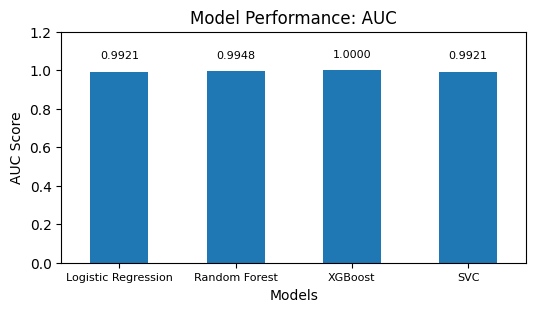

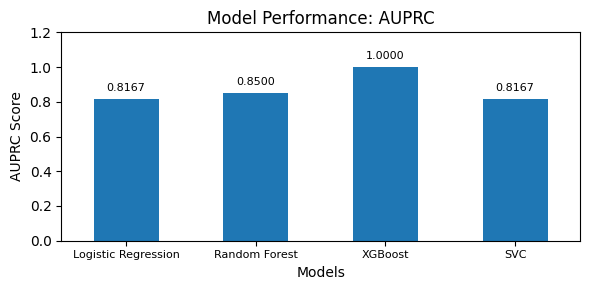

In [2156]:
make_chart_from_dic(im_dic)

## PLCO + Imaging Features

The dataframe used in training is named 'final_merged_sorted_df'

The list of PLCO features is named "plco_features_list" 

The image feature vector is named "flat_feature_vector_non_zero"

In [107]:
plco_im_dic = {}

X = final_merged_sorted_df[plco_features_list]
X = pd.concat([X, flat_feature_vector_non_zero], axis=1)
X.columns = [str(col) for col in X.columns]
    
y = final_merged_sorted_df['First Year Diagnosis']

In [108]:
# Define the numerical and categorical features
numerical_cols = X[plco_features_list].select_dtypes(include=['number']).columns  
categorical_cols = X[plco_features_list].select_dtypes(exclude=['number']).columns  
pca_cols = [str(col) for col in flat_feature_vector_non_zero.columns]


# Define the pipeline for PCA on numerical features and imputation for missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('num_pca', Pipeline([
            ('scaler', MinMaxScaler()),
            ('pca', PCA(n_components=0.95))
        ]), pca_cols), # Apply scaler and pca to image features
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler())
        ]), numerical_cols),  # Apply imputer and scaler to  numerical features
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)  # Apply imputer and one-hot-encoding to categorical features
    ]
)

### Logistic Regression

In [109]:
# Create a pipeline that first scales the data then trains the model
pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(solver='liblinear'))
])

#specify parameter values to search
params_lr = {}
params_lr['logreg__C'] = [0.1, 1, 10]
params_lr['logreg__penalty'] = ['l1', 'l2']

In [110]:
best_log_reg_plco_im, roc_score_lr_plco_im, auprc_lr_plco_im = train_model(X, y, pipe_lr, params_lr)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [111]:
print_model_scores(best_log_reg_plco_im, roc_score_lr_plco_im, auprc_lr_plco_im)

The best AUC score: 0.892632498543972
was achieved with the parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l2'}
On the test set, the model achieved an AUC of: 0.9868766404199475
On the test set, the model achieved an AUPRC of: 0.7767857142857143


In [112]:
plco_im_dic["Logistic Regression"] = [roc_score_lr_plco_im, auprc_lr_plco_im]

### Random Forest

In [113]:
# Create a pipeline that first scales the data then trains the model
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('randfor', RandomForestClassifier())
])

#specify parameter values to search
params_rf = {}
params_rf['randfor__n_estimators'] = [10, 100, 500]
params_rf['randfor__max_features'] = [2, 4, 6, 8, 10]

In [114]:
best_rand_for_plco_im, roc_score_rf_plco_im, auprc_rf_plco_im = train_model(X, y, pipe_rf, params_rf)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2328]:
print_model_scores(best_rand_for_plco_im, roc_score_rf_plco_im, auprc_rf_plco_im)

The best AUC score: 0.8743156668608038
was achieved with the parameters: {'randfor__max_features': 10, 'randfor__n_estimators': 100}
On the test set, the model achieved an AUC of: 0.9973753280839894
On the test set, the model achieved an AUPRC of: 0.9027777777777777


In [2329]:
plco_im_dic["Random Forest"] = [roc_score_rf_im, auprc_rf_im]

### XGBoost

In [115]:
# Create a pipeline that first scales the data then trains the model
pipe_xgb = Pipeline([
    ('preprocessor', preprocessor), 
    ('xgb', XGBClassifier())
])

#specify parameter values to search
params_xgb = {}
params_xgb['xgb__max_depth'] = [10, 25, 50]
params_xgb['xgb__n_estimators'] = [10, 30, 50, 70]

In [2334]:
best_xgboost_plco_im, roc_score_xgb_plco_im, auprc_xgb_plco_im = train_model(X, y, pipe_xgb, params_xgb)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2335]:
print_model_scores(best_xgboost_plco_im, roc_score_xgb_plco_im, auprc_xgb_plco_im)

The best AUC score: 0.8884876722966414
was achieved with the parameters: {'xgb__max_depth': 10, 'xgb__n_estimators': 10}
On the test set, the model achieved an AUC of: 1.0
On the test set, the model achieved an AUPRC of: 1.0


In [2336]:
plco_im_dic["XGBoost"] = [roc_score_xgb_im, auprc_xgb_im]

### SVC

In [116]:
# Create a pipeline that first scales the data then trains the model
pipe_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC(probability = True))
])

#specify parameter values to search
params_svc = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__degree': [2, 3, 4],
    'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'svc__coef0': [0.0, 0.1, 0.5, 1],
    'svc__class_weight': [None, 'balanced']
}

In [2338]:
best_svc_plco_im, roc_score_svc_plco_im, auprc_svc_plco_im = train_model(X, y, pipe_svc, params_svc)

The predicted labels are: 
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2339]:
print_model_scores(best_svc_plco_im, roc_score_svc_plco_im, auprc_svc_plco_im)

The best AUC score: 0.9143758493496408
was achieved with the parameters: {'svc__C': 1, 'svc__class_weight': 'balanced', 'svc__coef0': 0.5, 'svc__degree': 2, 'svc__gamma': 'auto', 'svc__kernel': 'sigmoid'}
On the test set, the model achieved an AUC of: 0.984251968503937
On the test set, the model achieved an AUPRC of: 0.7638888888888888


In [2340]:
plco_im_dic["SVC"] = [roc_score_svc_plco_im, auprc_svc_plco_im]

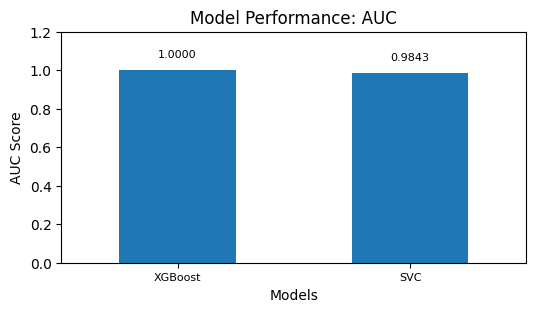

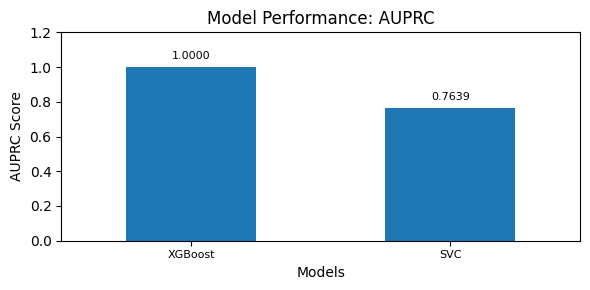

In [2341]:
make_chart_from_dic(plco_im_dic)

## Geographic + Imaging Features

The dataframe used in training is named 'final_merged_sorted_df'

The list of Geographic features is named "training_features_list"

The image feature vector is named "flat_feature_vector_non_zero"

In [145]:
geo_im_dic = {}

X = final_merged_sorted_df[training_features_list]
X = pd.concat([X, flat_feature_vector_non_zero], axis=1)
X.columns = [str(col) for col in X.columns]
    
y = final_merged_sorted_df['First Year Diagnosis']

In [146]:
# Define the numerical and categorical features
numerical_cols = X[training_features_list].select_dtypes(include=['number']).columns  
categorical_cols = X[training_features_list].select_dtypes(exclude=['number']).columns  
pca_cols = [str(col) for col in flat_feature_vector_non_zero.columns]


# Define the pipeline for PCA on numerical features and imputation for missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('num_pca', Pipeline([
            ('scaler', MinMaxScaler()),
            ('pca', PCA(n_components=0.95))
        ]), pca_cols), # Apply scaler and pca to image features
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler())
        ]), numerical_cols),  # Apply imputer and scaler to  numerical features
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)  # Apply imputer and one-hot-encoding to categorical features
    ]
)

### Logistic Regression

In [147]:
# Create a pipeline that first scales the data then trains the model
pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(solver = 'liblinear'))
])

#specify parameter values to search
params_lr = {}
params_lr['logreg__C'] = [0.1, 1, 10]
params_lr['logreg__penalty'] = ['l1', 'l2']

In [148]:
best_log_reg_model_geo_im, roc_score_lr_geo_im, auprc_lr_geo_im = train_model(X, y, pipe_lr, params_lr)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [150]:
print_model_scores(best_log_reg_model_geo_im, roc_score_lr_geo_im, auprc_lr_geo_im)

The best AUC score: 0.9720151426907396
was achieved with the parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l1'}
On the test set, the model achieved an AUC of: 0.9632545931758529
On the test set, the model achieved an AUPRC of: 0.7169117647058822


In [151]:
geo_im_dic["Logistic Regression"] = [roc_score_lr_geo_im, auprc_lr_geo_im]

### Random Forest

In [152]:
# Create a pipeline that first scales the data then trains the model
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('randfor', RandomForestClassifier())
])

#specify parameter values to search
params_rf = {}
params_rf['randfor__n_estimators'] = [10, 100, 500]
params_rf['randfor__max_features'] = [2, 4, 6, 8, 10]

In [153]:
best_rand_for_model_geo_im, roc_score_rf_geo_im, auprc_rf_geo_im = train_model(X, y, pipe_rf, params_rf)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [154]:
print_model_scores(best_rand_for_model_geo_im, roc_score_rf_geo_im, auprc_rf_geo_im)

The best AUC score: 0.936648223645894
was achieved with the parameters: {'randfor__max_features': 8, 'randfor__n_estimators': 500}
On the test set, the model achieved an AUC of: 0.9816272965879266
On the test set, the model achieved an AUPRC of: 0.7537037037037037


In [2219]:
geo_im_dic["Random Forest"] = [roc_score_rf_geo_im, auprc_rf_geo_im]

### XGBoost

In [155]:
# Create a pipeline that first scales the data then trains the model
pipe_xgb = Pipeline([
    ('preprocessor', preprocessor), 
    ('xgb', XGBClassifier())
])

#specify parameter values to search
params_xgb = {}
params_xgb['xgb__max_depth'] = [10, 25, 50]
params_xgb['xgb__n_estimators'] = [10, 30, 50, 70]

In [2221]:
best_xgboost_model_geo_im, roc_score_xgb_geo_im, auprc_xgb_geo_im = train_model(X, y, pipe_xgb, params_xgb)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2222]:
print_model_scores(best_xgboost_model_geo_im, roc_score_xgb_geo_im, auprc_xgb_geo_im)

The best AUC score: 0.9060376625897885
was achieved with the parameters: {'xgb__max_depth': 10, 'xgb__n_estimators': 50}
On the test set, the model achieved an AUC of: 0.9343832020997376
On the test set, the model achieved an AUPRC of: 0.6968694885361552


In [2223]:
geo_im_dic["XGBoost"] = [roc_score_xgb_geo_im, auprc_xgb_geo_im]

### SVC

In [156]:
# Create a pipeline that first scales the data then trains the model
pipe_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC(probability = True))
])

#specify parameter values to search
params_svc = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__degree': [2, 3, 4],
    'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'svc__coef0': [0.0, 0.1, 0.5, 1],
    'svc__class_weight': [None, 'balanced']
}

In [2226]:
best_svc_model_geo_im, roc_score_svc_geo_im, auprc_svc_geo_im = train_model(X, y, pipe_svc, params_svc)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2227]:
print_model_scores(best_svc_model_geo_im, roc_score_svc_geo_im, auprc_svc_geo_im)

The best AUC score: 0.9707532517957678
was achieved with the parameters: {'svc__C': 1, 'svc__class_weight': 'balanced', 'svc__coef0': 0.0, 'svc__degree': 2, 'svc__gamma': 0.01, 'svc__kernel': 'sigmoid'}
On the test set, the model achieved an AUC of: 0.984251968503937
On the test set, the model achieved an AUPRC of: 0.7638888888888888


In [2228]:
geo_im_dic["SVC"] = [roc_score_svc_geo_im, auprc_svc_geo_im]

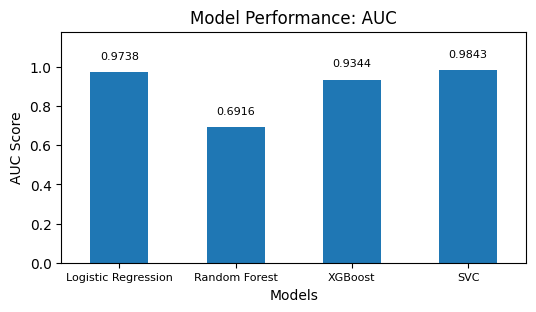

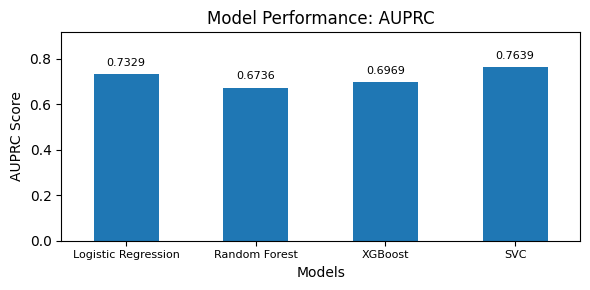

In [2229]:
make_chart_from_dic(geo_im_dic)

# Using L1 Regularization for Feature Selection

In [161]:
X = perform_data_preprocessing(training_features_list)
X = pd.concat([X, flat_feature_vector_non_zero], axis=1)
X.columns = [str(col) for col in X.columns]
    
y = final_merged_sorted_df['First Year Diagnosis']

/tmp/ipykernel_3460537/3905164913.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[numerical_cols] = training_df[numerical_cols].fillna(training_df[numerical_cols].mean())
/tmp/ipykernel_3460537/3905164913.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[categorical_cols] = training_df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))


In [162]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Logistic Regression with regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1711]:
# Fit the Logistic Regression model with L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)  # Adjust C for stronger or weaker regularization
logreg.fit(X_train_scaled, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [1721]:
# Get the coefficients
coefficients = logreg.coef_[0]

# Identify the features with non-zero coefficients
selected_features = np.where(coefficients != 0)[0]

print("Selected features indexes:", selected_features)

Selected features indexes: [  2   9  22  24  33  34  45  46  50  64  72  76  77  82  83  84  85  86
  91  92  96  98  99 103 104 105 106 110 115 116 119 120 125 126 131 132
 133 138 139 160 170 187 190 203 207 215 216 217 226 244 261 265 267 274
 277 292 298 319 330 332 335]


In [1722]:
# Create a DataFrame to hold the data and feature names
feature_names = [f'feature_{i}' for i in range(X.shape[1])]

# Get the column names of the selected features

selected_features_names = [X.columns.tolist()[i] for i in selected_features]
selected_features_names

['intensity_final_corrected_x',
 'interval_2016_to_last_img_exam_x',
 'pct_no_computer',
 'pct_hh_children',
 'pct_asian_lang',
 'pct_vacant',
 'wildfire_pct',
 'lim_transit_access',
 'bphigh_crudeprev',
 'checkup_crudeprev',
 'binge_crudeprev',
 'loc_t0',
 'adi_new',
 'lungrads_x_4A',
 'lungrads_x_4B',
 'lungrads_x_4X',
 'sex_x_Female',
 'sex_x_Male',
 'copd_No',
 'copd_Yes',
 'race_ethnicity_new_x_Hispanic',
 'race_ethnicity_new_x_White',
 'insurance_new_x_Medicare/Medicaid',
 'education_new_x_High school graduate or GED',
 'education_new_x_Less than high school graduate',
 'education_new_x_Postgraduate',
 'education_new_x_Some college or technical school',
 'lungrads_category_x_3-4',
 'eligibility_final_corrected_x_Ineligible: pack-years<30 - before',
 'eligibility_final_corrected_x_Ineligible: years since quit>15',
 'smoking_status_final_corrected_x_Current',
 'smoking_status_final_corrected_x_Former',
 'last_exam_type_x_Lung Non-Screening LDCT',
 'last_exam_type_x_Lung Screening L

## Geographic + Imaging Features + Lasso Regression

The list of L1 reduced features is named "training_features_list"

The image feature vector is named "flat_feature_vector_non_zero"

In [1725]:
geo_lasso_dic = {}

X= X[selected_features_names]
    
y = final_merged_sorted_df['First Year Diagnosis']

### Logistic Regression

In [1729]:
# Create a pipeline that first scales the data then trains the model
pipe_lr = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('logreg', LogisticRegression(solver = 'liblinear'))
])

#specify parameter values to search
params_lr_lasso = {}
params_lr_lasso['logreg__C'] = [0.1, 1, 10]
params_lr_lasso['logreg__penalty'] = ['l1', 'l2']

In [1730]:
best_log_reg_model_lasso, roc_score_lr_lasso, auprc_lr_lasso = train_model(X, y, pipe_lr, params_lr)

In [1731]:
print_model_scores(best_log_reg_model_lasso, roc_score_lr_lasso, auprc_lr_lasso)

The best AUC score: 0.933721607454863
was achieved with the parameters: {'logreg__C': 1, 'logreg__penalty': 'l1'}
On the test set, the model achieved an AUC of: 0.9632545931758529
On the test set, the model achieved an AUPRC of: 0.7169117647058822


In [1735]:
geo_lasso_dic["Logistic Regression"] = [roc_score_lr_lasso, auprc_lr_lasso]

### Random Forest

In [1732]:
# Create a pipeline that first scales the data then trains the model
pipe_rf = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('randfor', RandomForestClassifier())
])

#specify parameter values to search
params_rf = {}
params_rf['randfor__n_estimators'] = [10, 100, 500]
params_rf['randfor__max_features'] = [2, 4, 6, 8, 10]

In [1733]:
best_rand_for_model_lasso, roc_score_rf_lasso, auprc_rf_lasso = train_model(X, y, pipe_rf, params_rf)

In [1734]:
print_model_scores(best_rand_for_model_lasso, roc_score_rf_lasso, auprc_rf_lasso)

The best AUC score: 0.8144971850126188
was achieved with the parameters: {'randfor__max_features': 10, 'randfor__n_estimators': 100}
On the test set, the model achieved an AUC of: 0.8464566929133858
On the test set, the model achieved an AUPRC of: 0.6803678678678678


In [1736]:
geo_lasso_dic["Random Forest"] = [roc_score_rf_lasso, auprc_rf_lasso]

### XGBoost

In [1699]:
# Create a pipeline that first scales the data then trains the model
pipe_xgb = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('xgb', XGBClassifier())
])

#specify parameter values to search
params_xgb = {}
params_xgb['xgb__max_depth'] = [10, 25, 50]
params_xgb['xgb__n_estimators'] = [10, 30, 50, 70]

In [1737]:
best_xgboost_model_lasso, roc_score_xgb_lasso, auprc_xgb_lasso = train_model(X, y, pipe_xgb, params_xgb)

In [1738]:
print_model_scores(best_xgboost_model_lasso, roc_score_xgb_lasso, auprc_xgb_lasso)

The best AUC score: 0.9272471364783537
was achieved with the parameters: {'xgb__max_depth': 10, 'xgb__n_estimators': 30}
On the test set, the model achieved an AUC of: 0.9317585301837271
On the test set, the model achieved an AUPRC of: 0.42980399230399224


In [1739]:
geo_lasso_dic["XGBoost"] = [roc_score_xgb_lasso, auprc_xgb_lasso]

### SVC

In [1740]:
# Create a pipeline that first scales the data then trains the model
pipe_svc = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svc', SVC(probability = True))
])

#specify parameter values to search
params_svc = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__degree': [2, 3, 4],
    'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'svc__coef0': [0.0, 0.1, 0.5, 1],
    'svc__class_weight': [None, 'balanced']
}

In [1741]:
best_svc_model_lasso, roc_score_svc_lasso, auprc_svc_lasso = train_model(X, y, pipe_svc, params_svc)

In [1742]:
print_model_scores(best_svc_model_lasso, roc_score_svc_lasso, auprc_svc_lasso)

The best AUC score: 0.9549504950495049
was achieved with the parameters: {'svc__C': 10, 'svc__class_weight': 'balanced', 'svc__coef0': 0.5, 'svc__degree': 2, 'svc__gamma': 0.1, 'svc__kernel': 'sigmoid'}
On the test set, the model achieved an AUC of: 0.6692913385826771
On the test set, the model achieved an AUPRC of: 0.15566270540190064


In [1743]:
geo_lasso_dic["SVC"] = [roc_score_svc_lasso, auprc_svc_lasso]

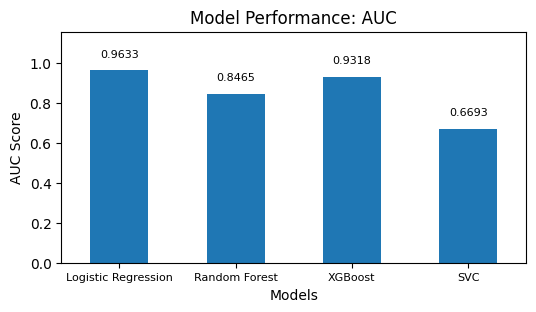

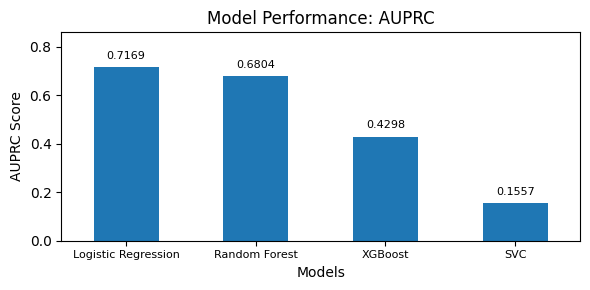

In [1744]:
make_chart_from_dic(geo_lasso_dic)

# Downloading NLST Dataset

In [797]:
pid2splid = pd.read_csv('/workspace/home/pid2split.csv')

In [798]:
pid2splid['SPLIT'].value_counts()

SPLIT
train    10200
dev       2472
test      2328
Name: count, dtype: int64

In [799]:
pid2splid_test = pid2splid[pid2splid['SPLIT'] == 'test']

In [800]:
pid2splid_test.sort_values(by ='PID')

,PID,SPLIT
12394,100005,test
10913,100012,test
992,100032,test
9412,100043,test
12389,100072,test
...,...,...
8863,218802,test
2214,218803,test
3256,218810,test
4567,218863,test


In [801]:
pid2splid_test_pid = pid2splid_test['PID']

In [802]:
directory = '/workspace/home/'

# Specify the full path including the file name
file_path = os.path.join(directory, 'pid2splid_test_pid.csv')

pid2splid_test_pid.to_csv(file_path, index=False)

In [803]:
import csv

directory = '/workspace/home/'

# Ensure the directory exists
os.makedirs(directory, exist_ok=True)

# Specify the full path including the file name
file_path = os.path.join(directory, 'pid2splid_test_pid.csv')

with open(file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(pid2splid_test_pid) 

# NLST Data 

In [804]:
participant_df = pd.read_csv(f'/workspace/home/NLST_clinical/csv/participant.csv')

/tmp/ipykernel_3460537/1953799411.py:1: DtypeWarning: Columns (201,224,225) have mixed types. Specify dtype option on import or set low_memory=False.
  participant_df = pd.read_csv(f'/workspace/home/NLST_clinical/csv/participant.csv')


In [805]:
participant_df.head(3)

,smokeage,smokeday,age_quit,cigsmok,gender,rndgroup,age,pkyr,scr_lat0,scr_lat1,scr_lat2,ELIG,loclhil,locllow,loclup,locrhil,locrlow,locrmid,locunk,locrup,locoth,locmed,loclmsb,locrmsb,loccar,loclin,lesionsize,de_type,de_grade,de_stag,scr_res0,scr_res1,scr_res2,scr_iso0,scr_iso1,scr_iso2,RACE,ETHNIC,EDUCAT,proc0,proc1,proc2,biop0,biop1,biop2,invas0,invas1,invas2,proclc,bioplc,invaslc,medcomp0,medcomp1,medcomp2,medcomplc,cancyr,can_scr,DCFICD,evp_revr,evpdirect,evpincomplete,deathstat,evpsel,evpcert,evpdeath,treatlc,mra_stat0,mra_stat1,mra_stat2,no_proc_reas0,no_proc_reas1,no_proc_reas2,study,conflc,canc_rpt_link,canc_rpt_source,WDLOST,CONTACTSTATUS,pid,smokelive,smokework,height,marital,pipe,cigar,lss_alcohol_freq,lss_alcohol_num,weight,wrkasbe,wrkbaki,wrkbutc,wrkchem,wrkcoal,wrkcott,wrkfarm,wrkfire,wrkflou,wrkfoun,wrkhard,wrkpain,wrksand,wrkweld,yrsasbe,yrsbaki,yrsbutc,yrschem,yrscoal,yrscott,yrsfarm,yrsfire,yrsflou,yrsfoun,yrshard,yrspain,yrssand,yrsweld,resasbe,resbaki,resbutc,reschem,rescoal,rescott,resfarm,resfire,resflou,resfoun,reshard,respain,ressand,resweld,diagasbe,diagadas,diagchas,diagbron,diagchro,diagcopd,diagdiab,diagemph,diagfibr,diaghear,diagpneu,diagsarc,diagsili,diagtube,diaghype,diagstro,ageasbe,ageadas,agechas,agebron,agechro,agecopd,agediab,ageemph,agefibr,agehear,agepneu,agesarc,agesili,agetube,agehype,agestro,cancblad,cancbrea,canccerv,canccolo,cancesop,canckidn,canclary,canclung,cancoral,cancnasa,cancpanc,cancphar,cancstom,cancthyr,canctran,ageblad,agebrea,agecerv,agecolo,ageesop,agekidn,agelary,agelung,ageoral,agenasa,agepanc,agephar,agestom,agethyr,agetran,famfather,fammother,fambrother,famsister,famchild,ineligible,smokeyr,dcfdeathlc,finaldeathLC,ndicd,evpsent,deathcutoff,acrin_alc_ever,acrin_alc_curr,acrin_lastdrink,acrin_drinkyrs_form,acrin_drinknum_form,acrin_drinkyrs_curr,acrin_drinknum_curr,acrin_drink24hr,cen,hasdcf,dataset_version,scr_days0,scr_days1,scr_days2,candx_days,fup_days,death_days,canc_free_days,confirmed_icd_topog1,confirmed_icd_topog2,confirmed_icd_topog3,confirmed_icd_topog4,confirmed_icd_morph1,confirmed_icd_morph2,confirmed_icd_morph3,confirmed_icd_morph4,confirmed_icd_behav1,confirmed_icd_behav2,confirmed_icd_behav3,confirmed_icd_behav4,confirmed_icd_grade1,confirmed_icd_grade2,confirmed_icd_grade3,confirmed_icd_grade4,confirmed_seer1,confirmed_seer2,confirmed_seer3,confirmed_seer4,confirmed_seercat1,confirmed_seercat2,confirmed_seercat3,confirmed_seercat4,confirmed_conforder1,confirmed_conforder2,confirmed_conforder3,confirmed_conforder4,num_confirmed,de_stag_7thed,progressed_ever,progression_num,progsite_orig_lung_1st,progsite_other_lung_1st,progsite_pleura_1st,progsite_mediastinum_1st,progsite_brain_1st,progsite_bone_1st,progsite_liver_1st,progsite_adrenal_1st,progsite_other_1st,progsite_skin_1st,progsite_lymph_n1_1st,progsite_lymph_n2_1st,progsite_lymph_n3_1st,progsite_unk_1st,progsite_orig_lung_ever,progsite_other_lung_ever,progsite_pleura_ever,progsite_mediastinum_ever,progsite_brain_ever,progsite_bone_ever,progsite_liver_ever,progsite_adrenal_ever,progsite_other_ever,progsite_skin_ever,progsite_lymph_n1_ever,progsite_lymph_n2_ever,progsite_lymph_n3_ever,progsite_unk_ever,progsite_orig_lung_num,progsite_other_lung_num,progsite_pleura_num,progsite_mediastinum_num,progsite_brain_num,progsite_bone_num,progsite_liver_num,progsite_adrenal_num,progsite_other_num,progsite_skin_num,progsite_lymph_n1_num,progsite_lymph_n2_num,progsite_lymph_n3_num,progsite_unk_num,prog_days_1st,prog_days_2nd,prog_days_3rd,prog_days_4th,prog_days_5th,progsite_orig_lung_days,progsite_other_lung_days,progsite_pleura_days,progsite_mediastinum_days,progsite_brain_days,progsite_bone_days,progsite_liver_days,progsite_adrenal_days,progsite_other_days,progsite_skin_days,progsite_lymph_n1_days,progsite_lymph_n2_days,progsite_lymph_n3_days,progsite_unk_days,last_progfree_days,confirmed_candxdays1,confirmed_candxdays2,confirmed_candxdays3,confirmed_candxdays4
0,4.0,30.0,NaN,1.0,1.0,2.0,70.0,99.0,0.0,0.0,0.0,2

In [806]:
participant_df.shape

(53452, 320)

In [807]:
#participant_df.columns.tolist()

In [901]:
# make list of PLCO features 
# Age, Education, BMI, COPD diagnosis, Race, Personal Cancer History, Family Cancer History, Smoking Status,
# Number of cigarettes smoked per day, Number of years as a smoker, Number of years since quitting smoking

# need to calculate BMI from height and weight

# need to determine if patient has ever been diagnosed with any type of cancer from columns:
# 'cancblad', 'cancbrea', 'canccerv', 'canccolo', 'cancesop', 'canckidn', 'canclary',
# 'canclung', 'cancoral', 'cancnasa', 'cancpanc', 'cancphar', 'cancstom', 'cancthyr', 'canctran',

# need to determine if patient has family history of cancer from columns:
#  'famfather', 'fammother', 'fambrother', 'famsister', 'famchild',

# need to calculate number of years since quitting smoking from columns:
# 'age' - 'age_quit'

# the year a patient develops cancer is a feature named 'cancyr'


complete_plco_features_list = ['pid','age', 'EDUCAT','height', 'weight',  'diagcopd', 'RACE', 'ETHNIC','cancblad', 'cancbrea', 'canccerv', 'canccolo', 'cancesop', 'canckidn', 'canclary',
                     'canclung', 'cancoral', 'cancnasa', 'cancpanc', 'cancphar', 'cancstom', 'cancthyr', 'canctran', 'famfather', 'fammother', 'fambrother', 
                      'famsister', 'famchild', 'cigsmok', 'smokeday', 'smokeyr', 'age_quit', 'candx_days', 'fup_days','scr_days0', 'scr_days1', 'scr_days2']

In [902]:
nlst_test_patients_df.columns.tolist()

['smokeage',
 'smokeday',
 'age_quit',
 'cigsmok',
 'gender',
 'rndgroup',
 'age',
 'pkyr',
 'scr_lat0',
 'scr_lat1',
 'scr_lat2',
 'ELIG',
 'loclhil',
 'locllow',
 'loclup',
 'locrhil',
 'locrlow',
 'locrmid',
 'locunk',
 'locrup',
 'locoth',
 'locmed',
 'loclmsb',
 'locrmsb',
 'loccar',
 'loclin',
 'lesionsize',
 'de_type',
 'de_grade',
 'de_stag',
 'scr_res0',
 'scr_res1',
 'scr_res2',
 'scr_iso0',
 'scr_iso1',
 'scr_iso2',
 'RACE',
 'ETHNIC',
 'EDUCAT',
 'proc0',
 'proc1',
 'proc2',
 'biop0',
 'biop1',
 'biop2',
 'invas0',
 'invas1',
 'invas2',
 'proclc',
 'bioplc',
 'invaslc',
 'medcomp0',
 'medcomp1',
 'medcomp2',
 'medcomplc',
 'cancyr',
 'can_scr',
 'DCFICD',
 'evp_revr',
 'evpdirect',
 'evpincomplete',
 'deathstat',
 'evpsel',
 'evpcert',
 'evpdeath',
 'treatlc',
 'mra_stat0',
 'mra_stat1',
 'mra_stat2',
 'no_proc_reas0',
 'no_proc_reas1',
 'no_proc_reas2',
 'study',
 'conflc',
 'canc_rpt_link',
 'canc_rpt_source',
 'WDLOST',
 'CONTACTSTATUS',
 'pid',
 'smokelive',
 'smokework

In [810]:
# make dataframe consisting of patients included in the NLST testing set

nlst_test_patients_df = participant_df[participant_df['pid'].isin(pid2splid_test_pid)]

In [811]:
nlst_test_patients_df

,smokeage,smokeday,age_quit,cigsmok,gender,rndgroup,age,pkyr,scr_lat0,scr_lat1,scr_lat2,ELIG,loclhil,locllow,loclup,locrhil,locrlow,locrmid,locunk,locrup,locoth,locmed,loclmsb,locrmsb,loccar,loclin,lesionsize,de_type,de_grade,de_stag,scr_res0,scr_res1,scr_res2,scr_iso0,scr_iso1,scr_iso2,RACE,ETHNIC,EDUCAT,proc0,proc1,proc2,biop0,biop1,biop2,invas0,invas1,invas2,proclc,bioplc,invaslc,medcomp0,medcomp1,medcomp2,medcomplc,cancyr,can_scr,DCFICD,evp_revr,evpdirect,evpincomplete,deathstat,evpsel,evpcert,evpdeath,treatlc,mra_stat0,mra_stat1,mra_stat2,no_proc_reas0,no_proc_reas1,no_proc_reas2,study,conflc,canc_rpt_link,canc_rpt_source,WDLOST,CONTACTSTATUS,pid,smokelive,smokework,height,marital,pipe,cigar,lss_alcohol_freq,lss_alcohol_num,weight,wrkasbe,wrkbaki,wrkbutc,wrkchem,wrkcoal,wrkcott,wrkfarm,wrkfire,wrkflou,wrkfoun,wrkhard,wrkpain,wrksand,wrkweld,yrsasbe,yrsbaki,yrsbutc,yrschem,yrscoal,yrscott,yrsfarm,yrsfire,yrsflou,yrsfoun,yrshard,yrspain,yrssand,yrsweld,resasbe,resbaki,resbutc,reschem,rescoal,rescott,resfarm,resfire,resflou,resfoun,reshard,respain,ressand,resweld,diagasbe,diagadas,diagchas,diagbron,diagchro,diagcopd,diagdiab,diagemph,diagfibr,diaghear,diagpneu,diagsarc,diagsili,diagtube,diaghype,diagstro,ageasbe,ageadas,agechas,agebron,agechro,agecopd,agediab,ageemph,agefibr,agehear,agepneu,agesarc,agesili,agetube,agehype,agestro,cancblad,cancbrea,canccerv,canccolo,cancesop,canckidn,canclary,canclung,cancoral,cancnasa,cancpanc,cancphar,cancstom,cancthyr,canctran,ageblad,agebrea,agecerv,agecolo,ageesop,agekidn,agelary,agelung,ageoral,agenasa,agepanc,agephar,agestom,agethyr,agetran,famfather,fammother,fambrother,famsister,famchild,ineligible,smokeyr,dcfdeathlc,finaldeathLC,ndicd,evpsent,deathcutoff,acrin_alc_ever,acrin_alc_curr,acrin_lastdrink,acrin_drinkyrs_form,acrin_drinknum_form,acrin_drinkyrs_curr,acrin_drinknum_curr,acrin_drink24hr,cen,hasdcf,dataset_version,scr_days0,scr_days1,scr_days2,candx_days,fup_days,death_days,canc_free_days,confirmed_icd_topog1,confirmed_icd_topog2,confirmed_icd_topog3,confirmed_icd_topog4,confirmed_icd_morph1,confirmed_icd_morph2,confirmed_icd_morph3,confirmed_icd_morph4,confirmed_icd_behav1,confirmed_icd_behav2,confirmed_icd_behav3,confirmed_icd_behav4,confirmed_icd_grade1,confirmed_icd_grade2,confirmed_icd_grade3,confirmed_icd_grade4,confirmed_seer1,confirmed_seer2,confirmed_seer3,confirmed_seer4,confirmed_seercat1,confirmed_seercat2,confirmed_seercat3,confirmed_seercat4,confirmed_conforder1,confirmed_conforder2,confirmed_conforder3,confirmed_conforder4,num_confirmed,de_stag_7thed,progressed_ever,progression_num,progsite_orig_lung_1st,progsite_other_lung_1st,progsite_pleura_1st,progsite_mediastinum_1st,progsite_brain_1st,progsite_bone_1st,progsite_liver_1st,progsite_adrenal_1st,progsite_other_1st,progsite_skin_1st,progsite_lymph_n1_1st,progsite_lymph_n2_1st,progsite_lymph_n3_1st,progsite_unk_1st,progsite_orig_lung_ever,progsite_other_lung_ever,progsite_pleura_ever,progsite_mediastinum_ever,progsite_brain_ever,progsite_bone_ever,progsite_liver_ever,progsite_adrenal_ever,progsite_other_ever,progsite_skin_ever,progsite_lymph_n1_ever,progsite_lymph_n2_ever,progsite_lymph_n3_ever,progsite_unk_ever,progsite_orig_lung_num,progsite_other_lung_num,progsite_pleura_num,progsite_mediastinum_num,progsite_brain_num,progsite_bone_num,progsite_liver_num,progsite_adrenal_num,progsite_other_num,progsite_skin_num,progsite_lymph_n1_num,progsite_lymph_n2_num,progsite_lymph_n3_num,progsite_unk_num,prog_days_1st,prog_days_2nd,prog_days_3rd,prog_days_4th,prog_days_5th,progsite_orig_lung_days,progsite_other_lung_days,progsite_pleura_days,progsite_mediastinum_days,progsite_brain_days,progsite_bone_days,progsite_liver_days,progsite_adrenal_days,progsite_other_days,progsite_skin_days,progsite_lymph_n1_days,progsite_lymph_n2_days,progsite_lymph_n3_days,progsite_unk_days,last_progfree_days,confirmed_candxdays1,confirmed_candxdays2,confirmed_candxdays3,confirmed_candxdays4
4,15.0,40.0,61.0,0.0,1.0,1.0,64.0,92.00,0.0,0.0,0.

In [903]:
# make plco features dataframe of NLST test patients 

nlst_test_patients_plco_df = nlst_test_patients_df[complete_plco_features_list]

In [904]:
nlst_test_patients_plco_df

,pid,age,EDUCAT,height,weight,diagcopd,RACE,ETHNIC,cancblad,cancbrea,canccerv,canccolo,cancesop,canckidn,canclary,canclung,cancoral,cancnasa,cancpanc,cancphar,cancstom,cancthyr,canctran,famfather,fammother,fambrother,famsister,famchild,cigsmok,smokeday,smokeyr,age_quit,candx_days,fup_days,scr_days0,scr_days1,scr_days2
4,100005.0,64.0,2.0,67.0,220.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,46.0,61.0,NaN,2435.0,56.0,382.0,746.0
11,100012.0,61.0,7.0,67.0,142.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,20.0,37.0,NaN,454.0,2451.0,16.0,363.0,NaN
31,100032.0,58.0,7.0,71.0,175.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,40.0,NaN,NaN,2591.0,0.0,401.0,702.0
42,100043.0,59.0,2.0,73.0,180.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,20.0,42.0,NaN,NaN,2453.0,15.0,429.0,722.0
71,100072.0,57.0,5.0,73.0,245.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,1.0,0.0,1.0,40.0,47.0,NaN,NaN,2299.0,0.0,344.0,751.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53359,218802.0,64.0,5.0,64.0,129.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,45.0,NaN,NaN,2638.0,0.0,367.0,734.0
53360,218803.0,57.0,5.0,69.0,171.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.0,39.0,NaN,NaN,2702.0,0.0,375.0,748.0
53367,218810.0,65.0,4.0,70.0,170.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,45.0,47.0,NaN,NaN,1340.0,0.0,392.0,728.0
53420,218863.0,62.0,3.0,64.0,155.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,40.0,40.0,56.0,NaN,2592.0,0.0,351.0,707.0


## Determine Most Recent Scan Time

In [905]:
def determine_time_to_last_scan(row):
    columns_to_check = ['scr_days0', 'scr_days1', 'scr_days2']
    
    if (not pd.isnull(row['scr_days2'])):
        return row['scr_days2']
    elif pd.isnull(row['scr_days2']) and (not pd.isnull(row['scr_days1'])):
        return row['scr_days1']
    elif pd.isnull(row['scr_days2']) and pd.isnull(row['scr_days2']):
        return row['scr_days0']

In [906]:
# add column to represent most recent scan

nlst_test_patients_plco_df['most_recent_scan'] = nlst_test_patients_plco_df.apply(determine_time_to_last_scan, axis=1)

/tmp/ipykernel_3460537/1305651157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlst_test_patients_plco_df['most_recent_scan'] = nlst_test_patients_plco_df.apply(determine_time_to_last_scan, axis=1)


## Calculate BMI

In [907]:
def calculate_bmi(row):
    columns_to_check = ['height', 'weight']
    
    if row[columns_to_check].isnull().any():
        return np.nan
    else: 
        return (row['weight'] / row['height'] / row['height']) * 703

In [908]:
# add column after calculation BMI from 'height' and 'weight'

nlst_test_patients_plco_df['BMI'] = nlst_test_patients_plco_df.apply(calculate_bmi, axis=1)

/tmp/ipykernel_3460537/2466216909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlst_test_patients_plco_df['BMI'] = nlst_test_patients_plco_df.apply(calculate_bmi, axis=1)


## Determine Personal History of Cancer

In [909]:
def determine_personal_cancer_history(row):
    columns_to_check = ['cancblad', 'cancbrea', 'canccerv', 'canccolo', 'cancesop', 'canckidn', 'canclary',
                        'canclung', 'cancoral', 'cancnasa', 'cancpanc', 'cancphar', 'cancstom', 'cancthyr', 'canctran']
    
    if row[columns_to_check].isnull().any():
        return np.nan
    elif (row[columns_to_check] == 1.0).any():
        return 1.0
    else:
        return 0

In [910]:
# add column to indicate whether a patient has a history of cancer

nlst_test_patients_plco_df['cancer_history'] = nlst_test_patients_plco_df.apply(determine_personal_cancer_history, axis=1)

/tmp/ipykernel_3460537/1397715584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlst_test_patients_plco_df['cancer_history'] = nlst_test_patients_plco_df.apply(determine_personal_cancer_history, axis=1)


## Determine Family History of Cancer

In [911]:
def determine_family_cancer_history(row):
    columns_to_check = ['famfather', 'fammother', 'fambrother', 'famsister', 'famchild']
    
    if row[columns_to_check].isnull().any():
        return np.nan
    elif (row[columns_to_check] == 1.0).any():
        return 1.0
    else:
        return 0

In [912]:
# add column to indicate whether a patient has a family history of cancer

nlst_test_patients_plco_df['family_cancer_history'] = nlst_test_patients_plco_df.apply(determine_family_cancer_history, axis=1)

/tmp/ipykernel_3460537/3649384997.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlst_test_patients_plco_df['family_cancer_history'] = nlst_test_patients_plco_df.apply(determine_family_cancer_history, axis=1)


## Determine number of years since quitting smoking

In [913]:
def determine_years_since_quiting(row):
    columns_to_check = ['age','age_quit']
    
    if  (not pd.isnull(row['cigsmok'])) and (row['cigsmok'] == 1.0):
        return 0
    elif row[columns_to_check].isnull().any():
        return np.nan
    else: 
        return row['age'] - row['age_quit']

In [914]:
# add column to indicate number of years since quitting smoking

nlst_test_patients_plco_df['years_since_quiting_smoking'] = nlst_test_patients_plco_df.apply(determine_years_since_quiting, axis=1)

/tmp/ipykernel_3460537/392438810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlst_test_patients_plco_df['years_since_quiting_smoking'] = nlst_test_patients_plco_df.apply(determine_years_since_quiting, axis=1)


## Determine Diagnosis

In [915]:
def determine_diagnosis(row):
    columns_to_check = ['candx_days']
    
    if row[columns_to_check].isnull().any():
        return 0
    else: 
        return 1

In [916]:
# add column to indicate positive or negative diagnosis

nlst_test_patients_plco_df['diagnosis'] = nlst_test_patients_plco_df.apply(determine_diagnosis, axis=1)

/tmp/ipykernel_3460537/671612634.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlst_test_patients_plco_df['diagnosis'] = nlst_test_patients_plco_df.apply(determine_diagnosis, axis=1)


## Determine days from scan to diagnosis

In [917]:
def determine_time_from_scan_to_diagnosis(row):
    if row['diagnosis'] == 1:
        return row['candx_days'] - row['most_recent_scan'] 
    else: 
        return row['fup_days'] - row['most_recent_scan'] 

In [918]:
# add column to indicate days from last scan to diagnosis

nlst_test_patients_plco_df['days_until_diagnosis'] = nlst_test_patients_plco_df.apply(determine_time_from_scan_to_diagnosis, axis=1)

/tmp/ipykernel_3460537/3093793878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlst_test_patients_plco_df['days_until_diagnosis'] = nlst_test_patients_plco_df.apply(determine_time_from_scan_to_diagnosis, axis=1)


## Determine years from scan to diagnosis

In [919]:
def determine_years_from_scan_to_diagnosis(row):
    return row['days_until_diagnosis']//365

In [920]:
# add column to indicate years from last scan to diagnosis

nlst_test_patients_plco_df['years_until_diagnosis'] = nlst_test_patients_plco_df.apply(determine_years_from_scan_to_diagnosis, axis=1)

/tmp/ipykernel_3460537/2326094022.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlst_test_patients_plco_df['years_until_diagnosis'] = nlst_test_patients_plco_df.apply(determine_years_from_scan_to_diagnosis, axis=1)


## Determine age at last screening

In [921]:
def determine_age_at_last_screening(row): 
    return row['age'] + (row['most_recent_scan']//365) 

In [922]:
# add column to indicate age at last screening

nlst_test_patients_plco_df['age_at_last_screening'] = nlst_test_patients_plco_df.apply(determine_age_at_last_screening, axis=1)

/tmp/ipykernel_3460537/191762604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlst_test_patients_plco_df['age_at_last_screening'] = nlst_test_patients_plco_df.apply(determine_age_at_last_screening, axis=1)


## Determine number of year until cancer diagnosis

In [923]:
def determine_years_until_cancer_diagnosis(row):
    columns_to_check = ['candx_days']
    
    if row[columns_to_check].isnull().any():
        return np.nan
    else: 
        return row['candx_days']//365

In [924]:
# add column to indicate number of years until cancer diagnosis

nlst_test_patients_plco_df['years_until_cancer_diagnosis'] = nlst_test_patients_plco_df.apply(determine_years_until_cancer_diagnosis, axis=1)

/tmp/ipykernel_3460537/1072399830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlst_test_patients_plco_df['years_until_cancer_diagnosis'] = nlst_test_patients_plco_df.apply(determine_years_until_cancer_diagnosis, axis=1)


## Determine if patient was diagnosed with lung cancer in the first year

In [925]:
def determine_first_year_diagnosis(row):
    
    if pd.isnull(row['years_until_cancer_diagnosis']) or (row['years_until_cancer_diagnosis'] != 0):
        return 0
    else:
        return 1

In [926]:
# Create a new column based on whether patient was diagnosed with lung cancer within first year

nlst_test_patients_plco_df['first_year_diagnosis'] = nlst_test_patients_plco_df.apply(determine_first_year_diagnosis, axis=1)

/tmp/ipykernel_3460537/3701970881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlst_test_patients_plco_df['first_year_diagnosis'] = nlst_test_patients_plco_df.apply(determine_first_year_diagnosis, axis=1)


## Represent education and race as categorical data

In [927]:
# set values of '99' in 'EDUCAT' and '99' and '7' in RACE' columns to null since they represent missing values

nlst_test_patients_plco_df.loc[nlst_test_patients_plco_df['EDUCAT'].isin([99.0]), 'EDUCAT'] = pd.NA
nlst_test_patients_plco_df.loc[nlst_test_patients_plco_df['RACE'].isin([99.0, 7.0]), 'RACE'] = pd.NA

In [928]:
nlst_test_patients_plco_df['RACE'].value_counts()

RACE
1.0    2149
2.0      65
3.0      50
6.0      36
5.0      14
4.0       3
Name: count, dtype: int64

In [929]:
def represent_education_as_category(row):
    
    if pd.isnull(row['EDUCAT']) or row['EDUCAT'] == 8.0:
        return np.nan
    
    elif row['EDUCAT'] == 1.0 or row['EDUCAT'] == 2.0:
        return 'Less than high school graduate'
    
    elif row['EDUCAT'] == 3.0:
        return 'High school graduate or GED'
    
    elif row['EDUCAT'] == 4.0:
        return 'Some training after high school'
    
    elif row['EDUCAT'] == 5.0:
        return 'Some college or technical school'
    
    elif row['EDUCAT'] == 6.0:
        return 'College Graduate'
    
    elif row['EDUCAT'] == 7.0:
        return 'Postgraduate'

In [930]:
# Create a new column based on to represent education as a categorical feature

nlst_test_patients_plco_df['education'] = nlst_test_patients_plco_df.apply(represent_education_as_category, axis=1)

/tmp/ipykernel_3460537/2219122389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlst_test_patients_plco_df['education'] = nlst_test_patients_plco_df.apply(represent_education_as_category, axis=1)


In [931]:
def represent_race_as_category(row):
    
    if pd.isnull(row['RACE']):
        return np.nan
    
    elif row['RACE'] == 1.0:
        return 'White'
    
    elif row['RACE'] == 2.0:
        return 'Black'
    
    elif row['RACE'] == 3.0:
        return 'Asian'
    
    elif row['RACE'] == 4.0:
        return 'American Indian or Alaska Native'
    
    elif row['ETHNIC'] == 1.0:
        return 'Hispanic'
    
    else:
        return 'Other'

In [932]:
# Create a new column based on to represent race as a categorical feature

nlst_test_patients_plco_df['race'] = nlst_test_patients_plco_df.apply(represent_race_as_category, axis=1)

/tmp/ipykernel_3460537/725713932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlst_test_patients_plco_df['race'] = nlst_test_patients_plco_df.apply(represent_race_as_category, axis=1)


# Prepare ML Training Data NLST

In [665]:
nlst_test_patients_plco_df.columns

Index(['age', 'EDUCAT', 'height', 'weight', 'diagcopd', 'RACE', 'ETHNIC',
       'cancblad', 'cancbrea', 'canccerv', 'canccolo', 'cancesop', 'canckidn',
       'canclary', 'canclung', 'cancoral', 'cancnasa', 'cancpanc', 'cancphar',
       'cancstom', 'cancthyr', 'canctran', 'famfather', 'fammother',
       'fambrother', 'famsister', 'famchild', 'cigsmok', 'smokeday', 'smokeyr',
       'age_quit', 'candx_days', 'fup_days', 'scr_days0', 'scr_days1',
       'scr_days2', 'most_recent_scan', 'BMI', 'cancer_history',
       'family_cancer_history', 'years_since_quiting_smoking', 'diagnosis',
       'days_until_diagnosis', 'years_until_diagnosis',
       'age_at_last_screening', 'years_until_cancer_diagnosis',
       'first_year_diagnosis', 'education', 'race'],
      dtype='object')

In [578]:
#get_dataframe_metrics(nlst_test_patients_plco_df)

In [666]:
plco_training_features_list = ['age_at_last_screening', 'education', 'BMI', 'diagcopd', 'race', 'cancer_history', 'family_cancer_history',
                               'cigsmok', 'smokeday', 'smokeyr', 'years_since_quiting_smoking']
plco_label = ['first_year_diagnosis']

In [667]:
nlst_plco_df = nlst_test_patients_plco_df[plco_training_features_list + plco_label]

In [668]:
get_dataframe_metrics(nlst_plco_df)

,Unique Values,Number of Unique Values,Number of Null Values
family_cancer_history,"[0.0, 1.0]",2,97
education,"[Less than high school graduate, Postgraduate,...",6,41
years_since_quiting_smoking,"[3.0, 0.0, 6.0, 15.0, 10.0, 1.0, 2.0, 9.0, 13....",22,16
race,"[White, Black, American Indian or Alaska Nativ...",6,11
diagcopd,"[0.0, 1.0]",2,6
BMI,"[34.45310759634663, 22.23791490309646, 24.4048...",960,5
cancer_history,"[0.0, 1.0]",2,5
age_at_last_screening,"[66.0, 61.0, 59.0, 60.0, 64.0, 58.0, 57.0, 56....",23,0
cigsmok,"[0.0, 1.0]",2,0
smokeday,"[40.0, 20.0, 30.0, 25.0, 60.0, 15.0, 120.0, 22...",35,0


In [669]:
get_dataframe_null_metrics(nlst_plco_df)

Total number of null values in the Features DataFrame: 181
Total number of entries in the Features DataFrame: 27936
Percentage of entries with a null value: 0.65%
Number of rows with at least one null value: 176


In [781]:
#nlst_test_patients_plco_df[numerical_cols].dtypes

## Get age of patient at final screening for UCLA dataset

In [691]:
updated_ucla_dataset = pd.read_excel('/datasets/Data_2016_lottie_merged_v20240731.xlsx')

In [692]:
updated_ucla_dataset = updated_ucla_dataset[updated_ucla_dataset['series_uid'].isin(final_merged_sorted_df['SeriesInstanceUID'].tolist())]
updated_ucla_dataset = updated_ucla_dataset.sort_values(by='Acc_num_h')
updated_ucla_dataset = updated_ucla_dataset.reset_index(drop=True)

In [699]:
time_to_last_exam = updated_ucla_dataset['interval_2016_to_last_img_exam'].tolist()

In [714]:
final_merged_sorted_df['most_recent_scan'] = time_to_last_exam

In [715]:
final_merged_sorted_df.head(3)

,MRN_h_x,Acc_num_h_x,SeriesInstanceUID,series_desc_x,hist_x,hist_category_x,stage_x,stage_category_x,interval_ct_hist_x,lungrads_x,age,sex_x,bmi,cancer_hx,fam_hx_lc,copd,race_ethnicity_new_x,insurance_new_x,education_new_x,lungrads_category_x,eligibility_final_corrected_x,smoking_status_final_corrected_x,intensity_final_corrected_x,quit_year_final_corrected_x,pk_final_corrected_x,duration_final_corrected_x,plco_score,comorbid_category_new,median_income_new_x,location_zipcode,last_exam_type_x,interval_2016_to_last_img_exam_x,nSES_quintile,pct_snap,food_insecurity,pct_preschool,vehicle_access,pct_poverty_families,pct_poverty_families_under5,pct_poverty_all,pct_poverty_under18,pct_poverty_over65,pct_eli_all,pct_unemployed,pct_no_computer,pct_no_internet,pct_hh_children,pct_singleadult_hh,pop_density,total_pop,seniors_alone_pct,pct_foreignborn,pct_not_eng,pct_lep,pct_spanish,pct_asian_lang,pct_vacant,pct_owner_occupied,pct_renter_occupied,pct_overcrowded,pct_mortgage_burden,pct_rent_burden,pct_eli_rent_burden,median_rent,pct_eviction_filing_rate,pct_eviction_rate,heatdays,wildfire_pct,lim_transit_access,retail_foodenv,pct_disabled,arthritis_crudeprev,bphigh_crudeprev,casthma_crudeprev,chd_crudeprev,copd_crudeprev,diabetes_crudeprev,highchol_crudeprev,kidney_crudeprev,mhlth_crudeprev,obesity_crudeprev,phlth_crudeprev,stroke_crudeprev,asthmaER_rate,heartattackER_rate,seniors_disabilities,checkup_crudeprev,dental_crudeprev,bpmed_crudeprev,cholscreen_crudeprev,mammouse_crudeprev,colon_screen_crudeprev,corem_crudeprev,corew_crudeprev,binge_crudeprev,csmoking_crudeprev,lpa_crudeprev,sleep_crudeprev,AccessionNumber,Diacom Directory,Unnamed: 0,MRN_h_y,Acc_num_h_y,exam_date,series_desc_y,hist_y,hist_category_y,stage_y,stage_category_y,post_screen_lc_x,interval_ct_hist_y,lungrads_y,sex_y,race_ethnicity_new_y,age_new,insurance_new_y,education_new_y,lungrads_category_y,post_screen_lc_y,eligibility_final_corrected_y,smoking_status_final_corrected_y,intensity_final_corrected_y,quit_year_final_corrected_y,pk_final_corrected_y,duration_final_corrected_y,fam_hx_lc_new,cci_t0,department_new,loc_t0,median_income_new_y,adi_new,distance_to_center_new,last_exam_type_y,interval_2016_to_last_img_exam_y,Diagnosis,interval_ct_hist_as_year,last_exam_as_year,Day of Diagnosis,Year of Diagnosis,Feature Vector,Sybil 1 Prediction,Sybil 2 Prediction,Sybil 3 Prediction,Sybil 4 Prediction,Sybil 5 Prediction,Sybil Ensemble Prediction,First Year Diagnosis,First Year Risk Score,interval_2016_to_last_img_exam,most_recent_scan
0,2460458378,1005053246,1.3.12.2.1107.5.1.4.51964.30000016050615572117...,Chest low dose 1.0 B50f,NaN,NaN,NaN,NaN,NaN,2,73.0,Male,23.0,No,No,No,White,Medicare/Medicaid,College Graduate,1-2,Newly eligible,Former,10.0,10.0,20.0,40.0,1.306628,2-3,75717.0,90404.0,Lung Screening LDCT,1088.0,5.0,3.3,14.6,82.1,8.8,5.6,5.7,9.7,6.2,12.7,15.5,3.3,4.8,7.5,18.4,45.8,3984.1,28084.0,38.8,19.5,25.1,6.1,11.3,4.5,8.4,34.5,65.5,1.8,7.4,17.7,10.6,1735.0,0.7,0.7,9.5,0.0,0.129093,88.757163,8.0,18.1,22.8,8.1,4.1,4.1,7.4,30.9,2.3,10.6,22.3,9.2,2.2,32.65,11.42,27.9,71.6,75.4,67.1,84.6,80.4,73.4,38.2,33.9,19.8,9.2,13.0,32.0,1005053246,/datasets/1005053246/Chest low dose 1.0 B50f,4411,2460458378,1005053246,2016-05-06,Chest low dose 1.0 B50f,NaN,NaN,NaN,NaN,NaN,NaN,2,Male,White,>=65,Medicare/Medicaid,College Graduate,1-2,NaN,Newly eligible,Former,10.0,10.0,20.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lung Screening LDCT,1088.0,0,NaN,2,1088.0,2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.002614143679095454, 0.012768073747244868, 0...","[0.024149747974363135, 0.0397637904643146, 0.0...","[0.0006226553737865955, 0.005167619556337853, ...","[0.002791824858990207, 0.009865956692336473, 0...","[0.013722923177036656, 0.03525246525107287, 0....","[0.010900917281180979, 0.02014553619432984, 0....",0,0.010901,1088.0,1088.0
1,2467550964,1005692582,1.3.12.2.1107.5.1.4.64297.30000016100615481865...,Chest 1.0 B45f,NaN,NaN,NaN,NaN,NaN,2,56.0,Female,23.0,No,Yes,No,White,Private or Com

In [716]:
final_merged_sorted_df['age_at_last_screening'] = final_merged_sorted_df.apply(determine_age_at_last_screening, axis = 1)

# Rename columns for parity between NLST and UCLA dataframes

In [725]:
rename_dict = {
    'education_new_x' : 'education',
    'bmi': 'BMI',
    'copd': 'diagcopd',
    'race_ethnicity_new_x': 'race',
    'cancer_hx' : 'cancer_history',
    'fam_hx_lc' : 'family_cancer_history',
    'smoking_status_final_corrected_x' : 'cigsmok',
    'intensity_final_corrected_x' : 'smokeday',
    'duration_final_corrected_x' : 'smokeyr',
    'quit_year_final_corrected_x' : 'years_since_quiting_smoking'
}

ucla_sybil_training_df = final_merged_sorted_df.rename(columns=rename_dict)

## Cast UCLA dataset columns to numerical values

In [821]:
import pickle

# Load Lung Cancer dataframe from file using pickle

with open('/workspace/home/ucla_sybil_training_df.pkl', 'rb') as file:
    ucla_sybil_training_df = pickle.load(file)

In [822]:
#ucla_sybil_training_df['diagcopd'] = ucla_sybil_training_df['diagcopd'].map({'Yes': 1, 'No': 0})
#ucla_sybil_training_df['family_cancer_history'] = ucla_sybil_training_df['family_cancer_history'].map({'Yes': 1, 'No': 0})
#ucla_sybil_training_df['cancer_history'] = ucla_sybil_training_df['cancer_history'].map({'Yes': 1, 'No': 0})
#ucla_sybil_training_df['cigsmok'] = ucla_sybil_training_df['cigsmok'].map({'Current': 1, 'Former': 0})

## Pickle datasets for use in machine learning training 

In [735]:
import pickle

# Specify the directory and filename
directory = '/workspace/home/'
filename = 'ucla_sybil_training_df.pkl'
file_path = os.path.join(directory, filename)

# Create the directory if it does not exist
os.makedirs(directory, exist_ok=True)

# Save the numpy array to a file using pickle
with open(file_path, 'wb') as file:
    pickle.dump(ucla_sybil_training_df, file)

In [933]:
import pickle

# Specify the directory and filename
directory = '/workspace/home/'
filename = 'nlst_test_patients_plco_df.pkl'
file_path = os.path.join(directory, filename)

# Create the directory if it does not exist
os.makedirs(directory, exist_ok=True)

# Save the numpy array to a file using pickle
with open(file_path, 'wb') as file:
    pickle.dump(nlst_test_patients_plco_df, file)

# ML Training Functions

In [839]:
def train_nlst_model(X_nlst, y_nlst, X_ucla, y_ucla, pipe, param_dic):

    # Use StratifiedKFold to ensure an even split regarding classes
    cv = StratifiedKFold(n_splits=5)

    # Perform cross-validation
    grid = GridSearchCV(pipe, param_dic, cv=cv, scoring='roc_auc')
    grid.fit(X_nlst, y_nlst)
    
    roc_score, auprc = evaluate_ucla_model(grid, X_ucla, y_ucla)
    
    return grid, roc_score, auprc

In [863]:
def evaluate_ucla_model(trained_model, X_test_set, y_test_set):
    
    trained_model.best_estimator_.named_steps['preprocessor'].transform(X_ucla)
    
    # Use the best estimator found by GridSearchCV
    best_model = trained_model.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict_proba(X_ucla)[:,1]
    y_pred2 = best_model.predict(X_ucla)

    print("The predicted labels are: \n", y_pred2.tolist())
    print("The actual labels are: \n", y_test_set.tolist())
    
    # Calculate accuracy
    roc_score = roc_auc_score(y_test_set, y_pred)

    # Calculate precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test_set, y_pred)

    # Calculate AUPRC
    auprc = auc(recall, precision)
    
    return roc_score, auprc

In [1263]:
def evaluate_nlst_model(trained_grid, X, y):
    
    best_model = trained_grid.best_estimator_
    
    # Use StratifiedKFold to ensure an even split regarding classes
    cv = StratifiedKFold(n_splits=5)
    
    # Calculate AUPRC for each fold
    auprc_scores = []
    auc_scores = []

    index = 1
    # Manually perform cross-validation to calculate AUPRC
    for train_idx, test_idx in cv.split(X, y):
        print('Working on fold: ' + str(index))
        
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        best_model.named_steps['preprocessor'].fit_transform(X_train)

        # Fit the best model on the training data
        best_model.fit(X_train, y_train)

        best_model.named_steps['preprocessor'].transform(X_test)
        
        # Get predicted probabilities for the positive class
        y_probs = best_model.predict_proba(X_test)[:, 1]
        
        # Calculate precision-recall curve
        #precision, recall, _ = precision_recall_curve(y_test, y_probs)

        # Calculate AUPRC
        #auprc = auc(recall, precision)

        # Calculate AUPRC
        auprc = average_precision_score(y_test, y_probs)
        auprc_scores.append(auprc)

        index += 1
        roc_score = roc_auc_score(y_test, y_probs)
        auc_scores.append(roc_score)
        print("AUC:", roc_score)
        print("AUPRC:", auprc)
        
    # Compute the average AUPRC
    average_auprc = np.mean(auprc_scores)
    average_auc = np.mean(auc_scores)
    print(f"Average AUPRC across all folds of NLST: {average_auprc:.3f}")
    print(f"Average AUC across all folds of NLST: {average_auc:.3f}")

# NLST Machine Learning Training

The UCLA Dataset is saved in a dataset named 'ucla_sybil_training_df'

There are a total of 32 positive cases in the UCLA dataset out of a total of 650 for a positive percent rate of 4.92%

There are a total of 17 positive cases diagnosed in the first year in the UCLA dataset for a first year positive diagnosis rate of 2.61%

The NLST Dataset is saved in a dataset named 'nlst_test_patients_plco_df'

There are a total of 154 positive cases in the NLST dataset out of a total of 2328 for a positive percent rate of 6.61%

There are a total of 38 positive cases diagnosed in the first year in the NLST dataset for a first year positive diagnosis rate of 1.63%

## PLCO Features

The list of PLCO features to be used for training is named 'plco_training_features_list'

The dataset labels are in the column labeled 'first_year_diagnosis'

In [825]:
import pickle

# Load Lung Cancer dataframe from file using pickle

with open('/workspace/home/nlst_test_patients_plco_df.pkl', 'rb') as file:
    nlst_test_patients_plco_df = pickle.load(file)

In [1237]:
plco_dic = {}

X_nlst = nlst_test_patients_plco_df[plco_training_features_list] 
y_nlst = nlst_test_patients_plco_df['first_year_diagnosis']

X_ucla = ucla_sybil_training_df[plco_training_features_list]
y_ucla = ucla_sybil_training_df['first_year_diagnosis']

In [1068]:
# Define the numerical and categorical features
numerical_cols = X_nlst[plco_training_features_list].select_dtypes(include=['number']).columns  
categorical_cols = X_nlst[plco_training_features_list].select_dtypes(exclude=['number']).columns  


# Define the pipeline for PCA on numerical features and imputation for missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', KNNImputer(n_neighbors=5)),
            ('scaler', MinMaxScaler())
        ]), numerical_cols),  # Apply imputer and scaler to  numerical features
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)  # Apply imputer and one-hot-encoding to categorical features
    ]
)

### Logistic Regression

In [1072]:
# Create a pipeline that first scales the data then trains the model
pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=1000))
])

#specify parameter values to search
params_lr = {}
params_lr['logreg__C'] = [0.1, 1, 10]
params_lr['logreg__penalty'] = ['l1', 'l2']

In [1073]:
best_log_reg_model, roc_score_lr, auprc_lr = train_nlst_model(X_nlst, y_nlst, X_ucla, y_ucla, pipe_lr, params_lr)

The predicted labels are: 
 [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,

In [1074]:
print_model_scores(best_log_reg_model, roc_score_lr, auprc_lr)

The best AUC score: 0.5794447910168433
was achieved with the parameters: {'logreg__C': 10, 'logreg__penalty': 'l1'}
On the test set, the model achieved an AUC of: 0.5836818139578107
On the test set, the model achieved an AUPRC of: 0.052301781676407554


In [1223]:
evaluate_nlst_model(best_log_reg_model,X_nlst, y_nlst)

Working on fold: 1
Working on fold: 2
Working on fold: 3
Working on fold: 4
Working on fold: 5
Average AUPRC across all folds of NLST: 0.045


In [1075]:
plco_dic["Logistic Regression"] = [roc_score_lr, auprc_lr]

### Random Forest

In [1076]:
# Create a pipeline that first scales the data then trains the model
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('randfor', RandomForestClassifier(class_weight='balanced'))
])

#specify parameter values to search
params_rf = {}
params_rf['randfor__n_estimators'] = [10, 100, 500]
params_rf['randfor__max_features'] = [2, 4, 6, 8, 10]

In [1077]:
best_rand_for_model, roc_score_rf, auprc_rf = train_nlst_model(X_nlst, y_nlst, X_ucla, y_ucla, pipe_rf, params_rf)

The predicted labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [1078]:
print_model_scores(best_rand_for_model, roc_score_rf, auprc_rf)

The best AUC score: 0.5832930442919525
was achieved with the parameters: {'randfor__max_features': 4, 'randfor__n_estimators': 500}
On the test set, the model achieved an AUC of: 0.6243843508967568
On the test set, the model achieved an AUPRC of: 0.05249441482762984


In [1224]:
evaluate_nlst_model(best_rand_for_model, X_nlst, y_nlst)

Working on fold: 1
Working on fold: 2
Working on fold: 3
Working on fold: 4
Working on fold: 5
Average AUPRC across all folds of NLST: 0.040


In [1079]:
plco_dic["Random Forest"] = [roc_score_rf, auprc_rf]

### XGBoost

In [1080]:
# Calculate class distribution
num_negative = sum(y_nlst == 0)
num_positive = sum(y_nlst == 1)

# Compute scale_pos_weight
scale_pos_weight = num_negative / num_positive

In [1081]:
# Create a pipeline that first scales the data then trains the model
pipe_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBClassifier(scale_pos_weight=scale_pos_weight))
])

#specify parameter values to search
params_xgb = {}
params_xgb['xgb__max_depth'] = [10, 25, 50]
params_xgb['xgb__n_estimators'] = [10, 30, 50, 70]

In [1082]:
best_xgboost_model, roc_score_xgb, auprc_xgb = train_nlst_model(X_nlst, y_nlst, X_ucla, y_ucla, pipe_xgb, params_xgb)

The predicted labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [1083]:
print_model_scores(best_xgboost_model, roc_score_xgb, auprc_xgb)

The best AUC score: 0.5474890829694322
was achieved with the parameters: {'xgb__max_depth': 25, 'xgb__n_estimators': 30}
On the test set, the model achieved an AUC of: 0.5859120899544653
On the test set, the model achieved an AUPRC of: 0.04358345927714151


In [1238]:
evaluate_nlst_model(best_xgboost_model, X_nlst, y_nlst)

Working on fold: 1
Working on fold: 2
Working on fold: 3
Working on fold: 4
Working on fold: 5
Average AUPRC across all folds of NLST: 0.026


In [1084]:
plco_dic["XGBoost"] = [roc_score_xgb, auprc_xgb]

### SVC

In [1085]:
# Create a pipeline that first scales the data then trains the model
pipe_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC(probability = True, class_weight='balanced'))
])

#specify parameter values to search
params_svc = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__degree': [2, 3, 4],
    'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'svc__coef0': [0.0, 0.1, 0.5, 1],
}

In [1086]:
best_svc_model, roc_score_svc, auprc_svc = train_nlst_model(X_nlst, y_nlst, X_ucla, y_ucla, pipe_svc, params_svc)

The predicted labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [1087]:
print_model_scores(best_svc_model, roc_score_svc, auprc_svc)

The best AUC score: 0.5937305053025577
was achieved with the parameters: {'svc__C': 10, 'svc__coef0': 0.0, 'svc__degree': 2, 'svc__gamma': 1, 'svc__kernel': 'rbf'}
On the test set, the model achieved an AUC of: 0.3581451537961156
On the test set, the model achieved an AUPRC of: 0.018366627532678207


In [1242]:
evaluate_nlst_model(best_svc_model, X_nlst, y_nlst)

Working on fold: 1
Working on fold: 2
Working on fold: 3
Working on fold: 4
Working on fold: 5
Average AUPRC across all folds of NLST: 0.026


In [1240]:
plco_dic["SVC"] = [roc_score_svc, auprc_svc]

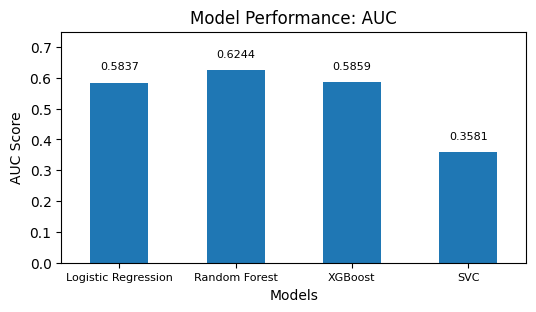

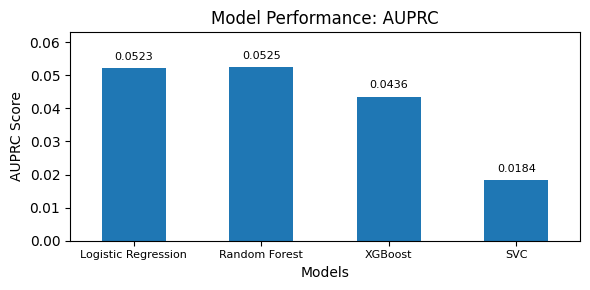

In [1089]:
make_chart_from_dic(plco_dic)

# Incorporating Image Features NLST

In [937]:
import pickle

# Load Lung Cancer dataframe from file using pickle

with open('/workspace/home/nlst_sybil_training_df.pkl', 'rb') as file:
    nlst_sybil_training_df = pickle.load(file)

In [941]:
# Flatten the nested lists
flattened_data_nlst = nlst_sybil_training_df['Feature Vector'].apply(lambda x: x[0])

# Convert the flattened data into a DataFrame with separate columns
flat_feature_vector_nlst_df = pd.DataFrame(flattened_data_nlst.tolist(), index=nlst_sybil_training_df.index)
###################################################################################

In [943]:
flat_feature_vector_nlst_df.tail(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511
2325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.183366,0.448270,1.645055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.197071,0.0,0.0,0.007004,0.0,0.0,0.0,0.0,0.889222,1.134263,0.0,0.0,0.0,0.0,0.0,0.000000,0.002551,0.0,0.0,2.261592,1.015070,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.886595,0.209838,0.0,0.0,0.0,0.0,0.0,0.062096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.458703,0.0,0.0,0.0,0.0,0.0,0.671585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034883,0.414419,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.664019,1.003299,0.0,0.0,0.872550,0.0,0.0,0.00000,0.472907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.274908,0.0,0.0,2.236784,0.0,0.381036,0.138676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.033175,0.0,0.0,0.009935,0.0,0.0,2.263813,0.0,1.962219,0.0,0.0,0.0,0.0,0.369101,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.520447,0.0,0.619282,0.0,0.0,0.0,0.380270,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.778253,0.0,0.0,0.0,0.496603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.612824,0.108895,0.0,0.0,0.0,0.0,1.162040,0.751254,0.0,0.0,0.0,0.0,0.0,0.947903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.882553,0.0,0.0,0.0,4.323877,2.694050,1.171777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.074378,0.0,0.0,0.0,2.137679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.809986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028808,0.0,2.079799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031593,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.400569,0.0,0.057267,2.859890,0.0,3.180377,1.664245,0.0,0.0,0.0,2.772927,0.0,0.0,0.0,2.707379,0.000000,0.0,0.0,0.0,0.183533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.726647,0.0,0.0,1.741490,2.693328,1.150434,0.0,0.0,0.0,0.0,1.245635,0.0,1.405131,0.0,0.0,0.057603,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.809911,0.0,0.0,2.426663,0.0,0.0,0.007432,0.0,0.0,1.151343,3.301621,0.219390,0.0,0.0,0.0,1.059239,3.047088,0.0,0.0,0.0,1.747514,0.0,0.0,0.0,0.000000,0.0,3.324699,0.0,0.816116,0.0,0.0,0.006587,0.00000,2.469914,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.983231,0.383981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.236258,0.0,0.0,0.0,0.0,0.0,0.006902,0.6530

# Imaging Features

The dataframes used in training are named 'nlst_sybil_training_df' and 'ucla_sybil_training_df'

The image feature vectors are named 'flat_feature_vector_nlst_df' and 'flat_feature_vector_df'

In [1251]:
im_dic = {}

X_nlst = flat_feature_vector_nlst_df
y_nlst = nlst_sybil_training_df['first_year_diagnosis']

X_ucla = flat_feature_vector_df
y_ucla = ucla_sybil_training_df['first_year_diagnosis']

In [1091]:
# Define the pipeline for PCA on imagining features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', MinMaxScaler()),
            ('pca', PCA(n_components = 0.95))
        ]), flat_feature_vector_nlst_df.columns.tolist()),  # Apply imputer and scaler to  numerical features
    ]
)

### Logistic Regression

In [1092]:
# Create a pipeline that first scales the data then trains the model
pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=1000))
])

#specify parameter values to search
params_lr = {}
params_lr['logreg__C'] = [0.1, 1, 10]
params_lr['logreg__penalty'] = ['l1', 'l2']

In [1093]:
best_log_reg_model_im, roc_score_lr_im, auprc_lr_im = train_nlst_model(X_nlst, y_nlst, X_ucla, y_ucla, pipe_lr, params_lr)

The predicted labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [1094]:
print_model_scores(best_log_reg_model_im, roc_score_lr_im, auprc_lr_im)

The best AUC score: 0.9001793512164691
was achieved with the parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l2'}
On the test set, the model achieved an AUC of: 0.8898801226651798
On the test set, the model achieved an AUPRC of: 0.37097995065834244


In [1201]:
evaluate_nlst_model(best_log_reg_model_im, X_nlst, y_nlst)

Working on fold: 1
Working on fold: 2
Working on fold: 3
Working on fold: 4
Working on fold: 5
Average AUPRC across all folds of NLST: 0.308


In [1095]:
im_dic["Logistic Regression"] = [roc_score_lr_im, auprc_lr_im]

### Random Forest

In [1096]:
# Create a pipeline that first scales the data then trains the model
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('randfor', RandomForestClassifier(class_weight='balanced'))
])

#specify parameter values to search
params_rf = {}
params_rf['randfor__n_estimators'] = [10, 100, 500]
params_rf['randfor__max_features'] = [2, 4, 6, 8, 10]

In [1097]:
best_rand_for_model_im, roc_score_rf_im, auprc_rf_im = train_nlst_model(X_nlst, y_nlst, X_ucla, y_ucla, pipe_rf, params_rf)

The predicted labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [1203]:
print_model_scores(best_rand_for_model_im, roc_score_rf_im, auprc_rf_im)

The best AUC score: 0.8805826758868702
was achieved with the parameters: {'randfor__max_features': 6, 'randfor__n_estimators': 100}
On the test set, the model achieved an AUC of: 0.8477371991450608
On the test set, the model achieved an AUPRC of: 0.3429761780075389


In [1204]:
best_rand_for_model_im.cv_results_

{'mean_fit_time': array([0.17667227, 0.33522162, 0.88820729, 0.20805321, 0.40298891,
        1.25114288, 0.22158237, 0.51155734, 1.45994053, 0.1967782 ,
        0.5486321 , 2.10988436, 0.62839346, 1.31198368, 2.1211165 ]),
 'std_fit_time': array([0.01467906, 0.0293632 , 0.00800682, 0.04566759, 0.03553382,
        0.09544069, 0.06309429, 0.05110969, 0.06955732, 0.03528146,
        0.08772825, 0.2141988 , 0.03599149, 0.23083181, 0.25550475]),
 'mean_score_time': array([0.01993694, 0.01252446, 0.03926792, 0.01781335, 0.01303949,
        0.04138813, 0.01815095, 0.01311011, 0.08263154, 0.01723299,
        0.01345339, 0.04632378, 0.01950712, 0.0169075 , 0.04217668]),
 'std_score_time': array([0.00811724, 0.000385  , 0.00033541, 0.00761593, 0.00086168,
        0.00535762, 0.00211633, 0.00085613, 0.07992126, 0.00501863,
        0.00077056, 0.00883349, 0.00660029, 0.00533048, 0.00249292]),
 'param_randfor__max_features': masked_array(data=[2, 2, 2, 4, 4, 4, 6, 6, 6, 8, 8, 8, 10, 10, 10],
      

In [1215]:
evaluate_nlst_model(best_rand_for_model_im, X_nlst, y_nlst)

Working on fold: 1
Working on fold: 2
Working on fold: 3
Working on fold: 4
Working on fold: 5
Average AUPRC across all folds of NLST: 0.217


In [1099]:
im_dic["Random Forest"] = [roc_score_rf_im, auprc_rf_im]

### XGBoost

In [1100]:
# Calculate class distribution
num_negative = sum(y_nlst == 0)
num_positive = sum(y_nlst == 1)

# Compute scale_pos_weight
scale_pos_weight = num_negative / num_positive

In [1101]:
# Create a pipeline that first scales the data then trains the model
pipe_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBClassifier(scale_pos_weight=scale_pos_weight))
])

#specify parameter values to search
params_xgb = {}
params_xgb['xgb__max_depth'] = [10, 25, 50]
params_xgb['xgb__n_estimators'] = [10, 30, 50, 70]

In [1102]:
best_xgboost_model_im, roc_score_xgb_im, auprc_xgb_im = train_nlst_model(X_nlst, y_nlst, X_ucla, y_ucla, pipe_xgb, params_xgb)

The predicted labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [1103]:
print_model_scores(best_xgboost_model_im, roc_score_xgb_im, auprc_xgb_im)

The best AUC score: 0.8524641297567062
was achieved with the parameters: {'xgb__max_depth': 25, 'xgb__n_estimators': 70}
On the test set, the model achieved an AUC of: 0.9094879658024347
On the test set, the model achieved an AUPRC of: 0.45381366127376954


In [1264]:
evaluate_nlst_model(best_xgboost_model_im, X_nlst, y_nlst)

Working on fold: 1
AUC: 0.6722161572052402
AUPRC: 0.11096884080339825
Working on fold: 2
AUC: 0.8628548034934498
AUPRC: 0.1566339090621586
Working on fold: 3
AUC: 0.8447052401746725
AUPRC: 0.06572518316541616
Working on fold: 4
AUC: 0.8742981908920774
AUPRC: 0.2189029924324042
Working on fold: 5
AUC: 0.8532439176543979
AUPRC: 0.1544858043328566
Average AUPRC across all folds of NLST: 0.141
Average AUC across all folds of NLST: 0.821


In [1104]:
im_dic["XGBoost"] = [roc_score_xgb_im, auprc_xgb_im]

### SVC

In [1105]:
# Create a pipeline that first scales the data then trains the model
pipe_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC(probability = True, class_weight='balanced'))
])

#specify parameter values to search
params_svc = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__degree': [2, 3, 4],
    'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'svc__coef0': [0.0, 0.1, 0.5, 1],
}

In [1106]:
best_svc_model_im, roc_score_svc_im, auprc_svc_im = train_nlst_model(X_nlst, y_nlst, X_ucla, y_ucla, pipe_svc, params_svc)

The predicted labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [1156]:
print_model_scores(best_svc_model_im, roc_score_svc_im, auprc_svc_im)

The best AUC score: 0.907727698066126
was achieved with the parameters: {'svc__C': 10, 'svc__coef0': 0.1, 'svc__degree': 2, 'svc__gamma': 0.01, 'svc__kernel': 'sigmoid'}
On the test set, the model achieved an AUC of: 0.9067930489731437
On the test set, the model achieved an AUPRC of: 0.3129295794376535


In [1235]:
evaluate_nlst_model(best_svc_model_im, X_nlst, y_nlst)

Working on fold: 1
Working on fold: 2
Working on fold: 3
Working on fold: 4
Working on fold: 5
Average AUPRC across all folds of NLST: 0.301


In [1108]:
im_dic["SVC"] = [roc_score_svc_im, auprc_svc_im]

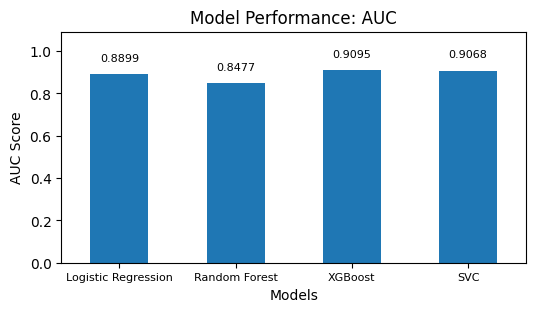

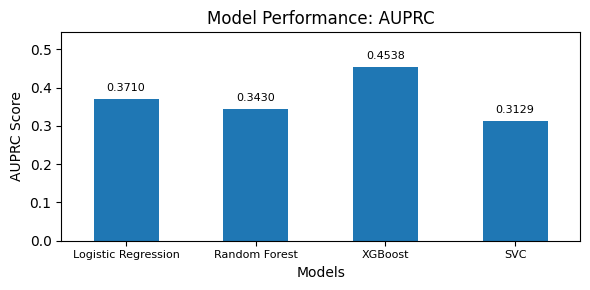

In [1109]:
make_chart_from_dic(im_dic)

## PLCO + Imaging Features

The dataframes used in training are named 'nlst_sybil_training_df' and 'ucla_sybil_training_df'

The list of PLCO features is named "plco_training_features_list" 

The image feature vectors are named 'flat_feature_vector_nlst_df' and 'flat_feature_vector_df'

In [1225]:
plco_im_dic = {}

X_nlst = nlst_sybil_training_df[plco_training_features_list] 
X_nlst = pd.concat([X_nlst, flat_feature_vector_nlst_df], axis=1)
X_nlst.columns = [str(col) for col in X_nlst.columns]

y_nlst = nlst_sybil_training_df['first_year_diagnosis']

X_ucla = ucla_sybil_training_df[plco_training_features_list]
X_ucla = pd.concat([X_ucla, flat_feature_vector_df], axis=1)
X_ucla.columns = [str(col) for col in X_ucla.columns]

y_ucla = ucla_sybil_training_df['first_year_diagnosis']

In [1111]:
# Define the numerical and categorical features
numerical_cols = X_nlst[plco_training_features_list].select_dtypes(include=['number']).columns  
categorical_cols = X_nlst[plco_training_features_list].select_dtypes(exclude=['number']).columns  
pca_cols = [str(col) for col in flat_feature_vector_nlst_df.columns]


# Define the pipeline for PCA on numerical features and imputation for missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('num_pca', Pipeline([
            ('scaler', MinMaxScaler()),
            ('pca', PCA(n_components=0.95))
        ]), pca_cols), # Apply scaler and pca to image features
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler())
        ]), numerical_cols),  # Apply imputer and scaler to  numerical features
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)  # Apply imputer and one-hot-encoding to categorical features
    ]
)


### Logistic Regression

In [1112]:
# Create a pipeline that first scales the data then trains the model
pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(solver='liblinear',class_weight='balanced', max_iter=1000))
])

#specify parameter values to search
params_lr = {}
params_lr['logreg__C'] = [0.1, 1, 10]
params_lr['logreg__penalty'] = ['l1', 'l2']

In [1113]:
best_log_reg_plco_im, roc_score_lr_plco_im, auprc_lr_plco_im = train_nlst_model(X_nlst, y_nlst, X_ucla, y_ucla, pipe_lr, params_lr)

/home/leonardgarcia/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  _check_large_sparse(X)
/home/leonardgarcia/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  _check_large_sparse(X)
/home/leonardgarcia/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  _check_large_sparse(X)


The predicted labels are: 
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [1114]:
print_model_scores(best_log_reg_plco_im, roc_score_lr_plco_im, auprc_lr_plco_im)

The best AUC score: 0.872528072364317
was achieved with the parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l2'}
On the test set, the model achieved an AUC of: 0.8927608958275254
On the test set, the model achieved an AUPRC of: 0.3850148436533462


In [1226]:
evaluate_nlst_model(best_log_reg_plco_im, X_nlst, y_nlst)

Working on fold: 1
Working on fold: 2
Working on fold: 3
Working on fold: 4
Working on fold: 5
Average AUPRC across all folds of NLST: 0.280


In [1115]:
plco_im_dic["Logistic Regression"] = [roc_score_lr_plco_im, auprc_lr_plco_im]

### Random Forest

In [1116]:
# Create a pipeline that first scales the data then trains the model
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('randfor', RandomForestClassifier(class_weight='balanced'))
])

#specify parameter values to search
params_rf = {}
params_rf['randfor__n_estimators'] = [10, 100, 500]
params_rf['randfor__max_features'] = [2, 4, 6, 8, 10]

In [1117]:
best_rand_for_plco_im, roc_score_rf_plco_im, auprc_rf_plco_im = train_nlst_model(X_nlst, y_nlst, X_ucla, y_ucla, pipe_rf, params_rf)

The predicted labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [1118]:
print_model_scores(best_rand_for_plco_im, roc_score_rf_plco_im, auprc_rf_plco_im)

The best AUC score: 0.8804546163443543
was achieved with the parameters: {'randfor__max_features': 6, 'randfor__n_estimators': 500}
On the test set, the model achieved an AUC of: 0.856565374965152
On the test set, the model achieved an AUPRC of: 0.35694564417699437


In [1227]:
evaluate_nlst_model(best_rand_for_plco_im, X_nlst, y_nlst)

Working on fold: 1
Working on fold: 2
Working on fold: 3
Working on fold: 4
Working on fold: 5
Average AUPRC across all folds of NLST: 0.227


In [1119]:
plco_im_dic["Random Forest"] = [roc_score_rf_im, auprc_rf_im]

### XGBoost

In [1120]:
# Calculate class distribution
num_negative = sum(y_nlst == 0)
num_positive = sum(y_nlst == 1)

# Compute scale_pos_weight
scale_pos_weight = num_negative / num_positive

In [1121]:
# Create a pipeline that first scales the data then trains the model
pipe_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBClassifier(scale_pos_weight=scale_pos_weight))
])

#specify parameter values to search
params_xgb = {}
params_xgb['xgb__max_depth'] = [10, 25, 50]
params_xgb['xgb__n_estimators'] = [10, 30, 50, 70]

In [1122]:
best_xgboost_plco_im, roc_score_xgb_plco_im, auprc_xgb_plco_im = train_nlst_model(X_nlst, y_nlst, X_ucla, y_ucla, pipe_xgb, params_xgb)

The predicted labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [1123]:
print_model_scores(best_xgboost_plco_im, roc_score_xgb_plco_im, auprc_xgb_plco_im)

The best AUC score: 0.8519572676232064
was achieved with the parameters: {'xgb__max_depth': 10, 'xgb__n_estimators': 50}
On the test set, the model achieved an AUC of: 0.9014032153145619
On the test set, the model achieved an AUPRC of: 0.4074836908535271


In [1228]:
evaluate_nlst_model(best_xgboost_plco_im, X_nlst, y_nlst)

Working on fold: 1
Working on fold: 2
Working on fold: 3
Working on fold: 4
Working on fold: 5
Average AUPRC across all folds of NLST: 0.167


In [1124]:
plco_im_dic["XGBoost"] = [roc_score_xgb_im, auprc_xgb_im]

### SVC

In [1125]:
# Create a pipeline that first scales the data then trains the model
pipe_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC(probability = True, class_weight='balanced'))
])

#specify parameter values to search
params_svc = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__degree': [2, 3, 4],
    'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'svc__coef0': [0.0, 0.1, 0.5, 1],
}

In [1126]:
best_svc_plco_im, roc_score_svc_plco_im, auprc_svc_plco_im = train_nlst_model(X_nlst, y_nlst, X_ucla, y_ucla, pipe_svc, params_svc)

The predicted labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [1127]:
print_model_scores(best_svc_plco_im, roc_score_svc_plco_im, auprc_svc_plco_im)

The best AUC score: 0.8999610106051155
was achieved with the parameters: {'svc__C': 0.01, 'svc__coef0': 0.0, 'svc__degree': 3, 'svc__gamma': 0.1, 'svc__kernel': 'poly'}
On the test set, the model achieved an AUC of: 0.9329058637673079
On the test set, the model achieved an AUPRC of: 0.4628400734581092


In [1229]:
evaluate_nlst_model(best_svc_plco_im, X_nlst, y_nlst)

Working on fold: 1
Working on fold: 2
Working on fold: 3
Working on fold: 4
Working on fold: 5
Average AUPRC across all folds of NLST: 0.244


In [1128]:
plco_im_dic["SVC"] = [roc_score_svc_plco_im, auprc_svc_plco_im]

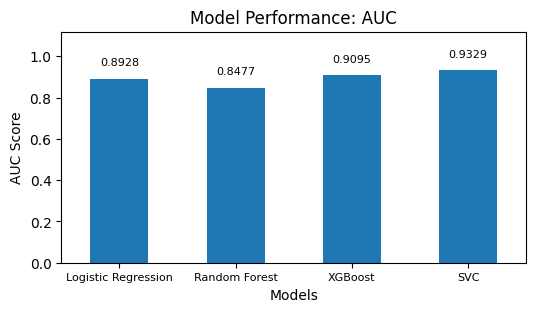

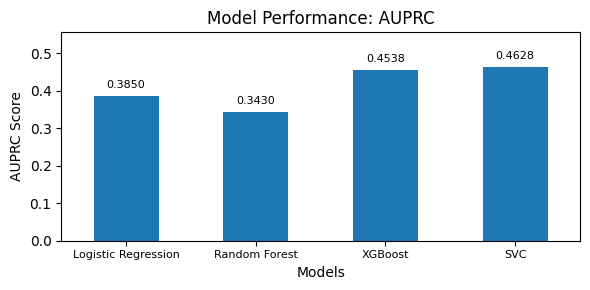

In [1129]:
make_chart_from_dic(plco_im_dic)

# Create Visualisations for Model Performance 

In [1134]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get the probabilities of the positive class
y_probs = best_xgboost_plco_im.predict_proba(X_ucla)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_ucla, y_probs)

# Compute AUC
roc_auc = auc(fpr, tpr)  # Alternatively, you can use roc_auc_score(y_test, y_probs)

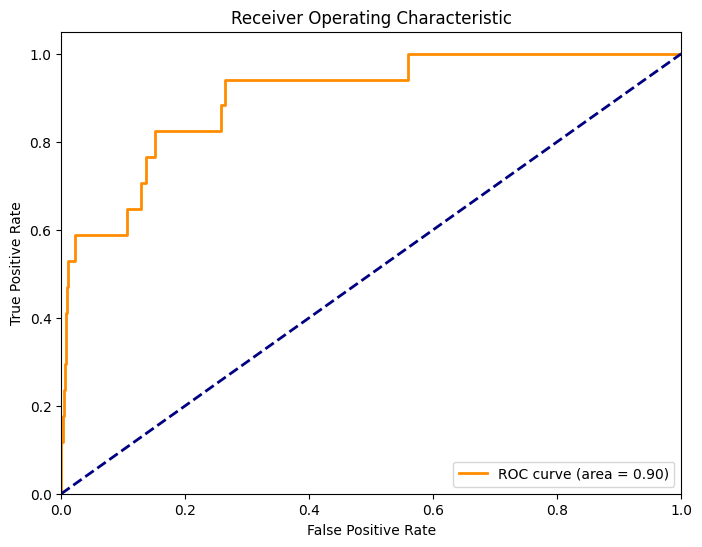

In [1136]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

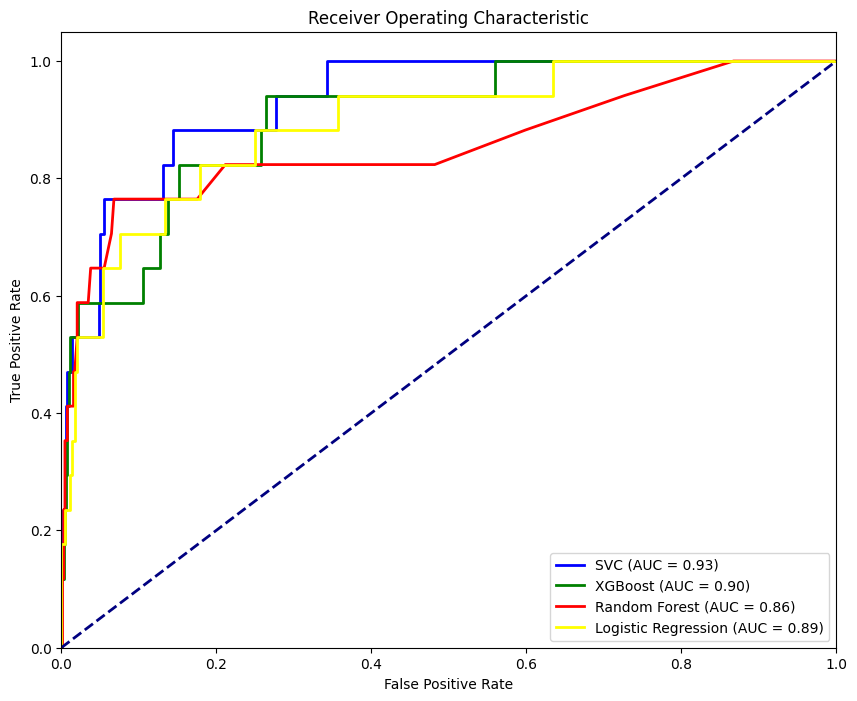

In [1139]:
# ROC Curve for IM + PLCO features

models_im_plco_dic = {
    'SVC' : best_svc_plco_im,
    'XGBoost' : best_xgboost_plco_im,
    'Random Forest' : best_rand_for_plco_im,
    'Logistic Regression' : best_log_reg_plco_im
}

# Initialize dictionary to hold ROC data
roc_im_plco_data = {}

# Calculate ROC curve and ROC area for each model
for name, model in models_im_plco_dic.items():
    y_probs = model.predict_proba(X_ucla)[:, 1]  # Get probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_ucla, y_probs)
    roc_auc = auc(fpr, tpr)
    roc_im_plco_data[name] = (fpr, tpr, roc_auc)
    
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'yellow']  # Colors for the different ROC curves

for (name, (fpr, tpr, roc_auc)), color in zip(roc_im_plco_data.items(), colors):
    plt.plot(fpr, tpr, color=color, lw=2,
             label='{0} (AUC = {1:0.2f})'.format(name, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [1274]:
def make_roc_curve(models, X_test, y_test, chart_title):
    
    
    # Initialize dictionary to hold ROC data
    roc_data = {}

    # Calculate ROC curve and ROC area for each model
    for name, model in models.items():
        y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        roc_data[name] = (fpr, tpr, roc_auc)
        
    plt.figure(figsize=(8, 6))
    #colors = ['blue', 'green', 'red', 'orange']  # Colors for the different ROC curves
    colors = ['blue']
    
    for (name, (fpr, tpr, roc_auc)), color in zip(roc_data.items(), colors):
        plt.plot(fpr, tpr, color=color, lw=2,
                 label='{0} (AUC = {1:0.2f})'.format(name, roc_auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic: ' + chart_title + ' Features')
    plt.legend(loc="lower right")
    plt.show()

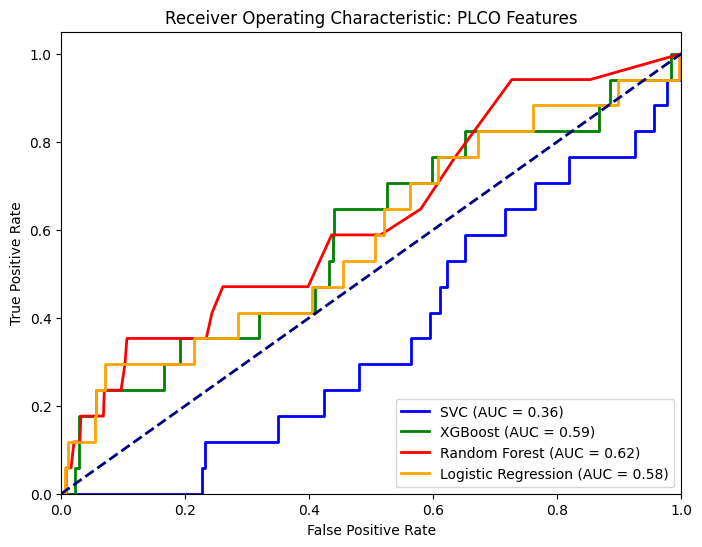

In [1160]:
# ROC Curve for PLCO features

models_dic = {
    'SVC' : best_svc_model,
    'XGBoost' : best_xgboost_model,
    'Random Forest' : best_rand_for_model,
    'Logistic Regression' : best_log_reg_model
}

make_roc_curve(models_dic, X_ucla, y_ucla, 'PLCO')

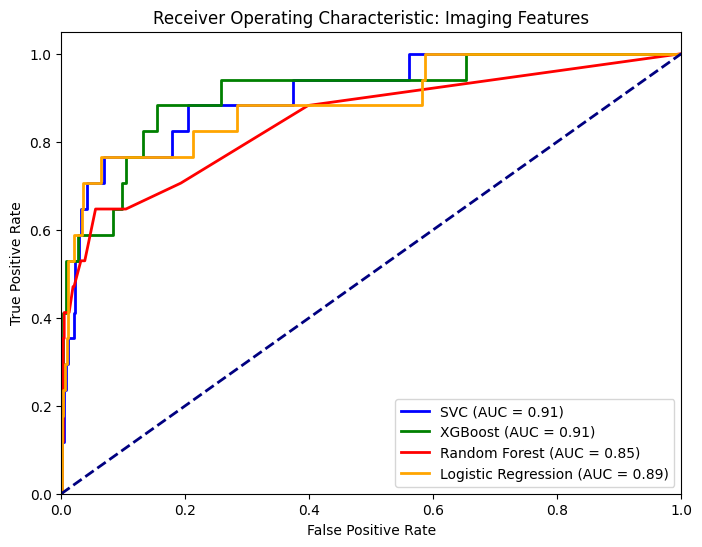

In [1162]:
# ROC Curve for IM features

models_im_dic = {
    'SVC' : best_svc_model_im,
    'XGBoost' : best_xgboost_model_im,
    'Random Forest' : best_rand_for_model_im,
    'Logistic Regression' : best_log_reg_model_im
}

make_roc_curve(models_im_dic, flat_feature_vector_df, y_ucla, 'Imaging')

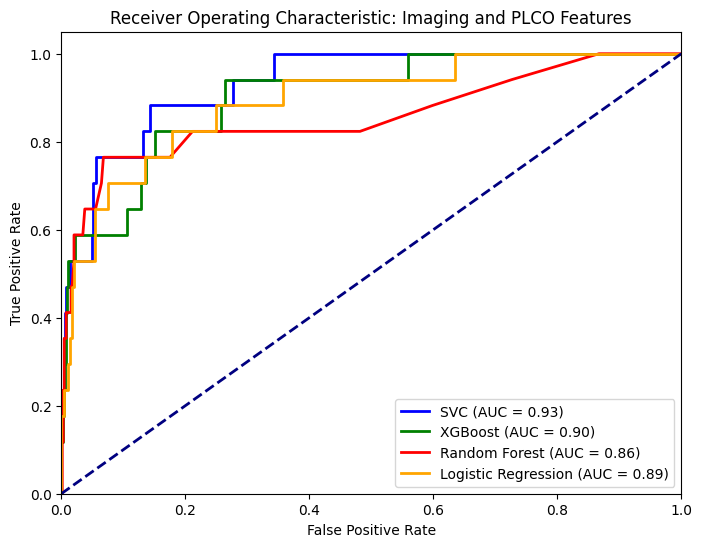

In [1149]:
# ROC Curve for IM + PLCO features

models_im_plco_dic = {
    'SVC' : best_svc_plco_im,
    'XGBoost' : best_xgboost_plco_im,
    'Random Forest' : best_rand_for_plco_im,
    'Logistic Regression' : best_log_reg_plco_im
}

make_roc_curve(models_im_plco_dic, X_ucla, y_ucla, 'Imaging and PLCO')

In [1283]:
def make_mixed_roc_curve(chart_title):
    
    
    # Initialize dictionary to hold ROC data
    roc_data = {}

    X_nlst = nlst_test_patients_plco_df[plco_training_features_list] 
    y_nlst = nlst_test_patients_plco_df['first_year_diagnosis']

    X_ucla = ucla_sybil_training_df[plco_training_features_list]
    y_ucla = ucla_sybil_training_df['first_year_diagnosis']

    y_probs = best_svc_model.predict_proba(X_ucla)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_ucla, y_probs)
    roc_auc = auc(fpr, tpr)
    roc_data['SVC: PLCO'] = (fpr, tpr, roc_auc)   
    
    
    
    X_nlst = flat_feature_vector_nlst_df
    y_nlst = nlst_sybil_training_df['first_year_diagnosis']

    X_ucla = flat_feature_vector_df
    y_ucla = ucla_sybil_training_df['first_year_diagnosis']
    
    y_probs = best_svc_model_im.predict_proba(X_ucla)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_ucla, y_probs)
    roc_auc = auc(fpr, tpr)
    roc_data['SVC: Imaging'] = (fpr, tpr, roc_auc)   
    
    
    
    X_nlst = nlst_sybil_training_df[plco_training_features_list] 
    X_nlst = pd.concat([X_nlst, flat_feature_vector_nlst_df], axis=1)
    X_nlst.columns = [str(col) for col in X_nlst.columns]

    y_nlst = nlst_sybil_training_df['first_year_diagnosis']

    X_ucla = ucla_sybil_training_df[plco_training_features_list]
    X_ucla = pd.concat([X_ucla, flat_feature_vector_df], axis=1)
    X_ucla.columns = [str(col) for col in X_ucla.columns]

    y_ucla = ucla_sybil_training_df['first_year_diagnosis']

    y_probs = best_svc_plco_im.predict_proba(X_ucla)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_ucla, y_probs)
    roc_auc = auc(fpr, tpr)
    roc_data['SVC: Imaging + PLCO'] = (fpr, tpr, roc_auc)   
    
        
    plt.figure(figsize=(8, 6))
    #colors = ['blue', 'green', 'red', 'orange']  # Colors for the different ROC curves
    colors = ['blue', 'green', 'red']
    
    for (name, (fpr, tpr, roc_auc)), color in zip(roc_data.items(), colors):
        plt.plot(fpr, tpr, color=color, lw=2,
                 label='{0} (AUC = {1:0.2f})'.format(name, roc_auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic: ' + chart_title)
    plt.legend(loc="lower right")
    plt.show()

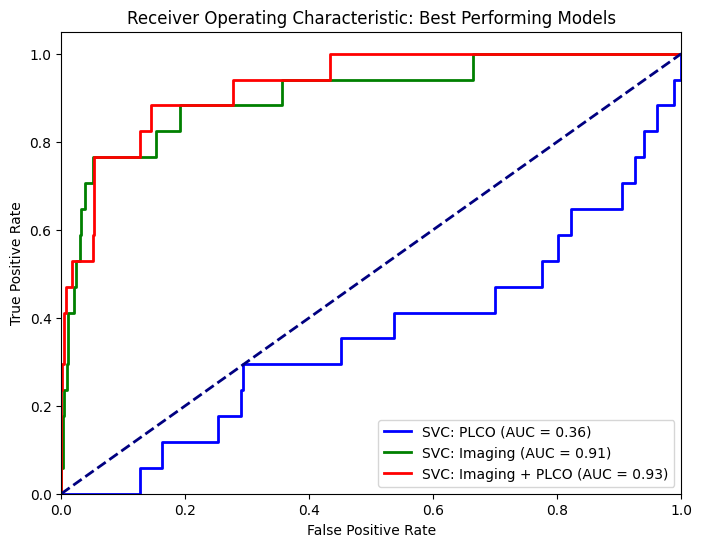

In [1284]:
make_mixed_roc_curve('Best Performing Models')

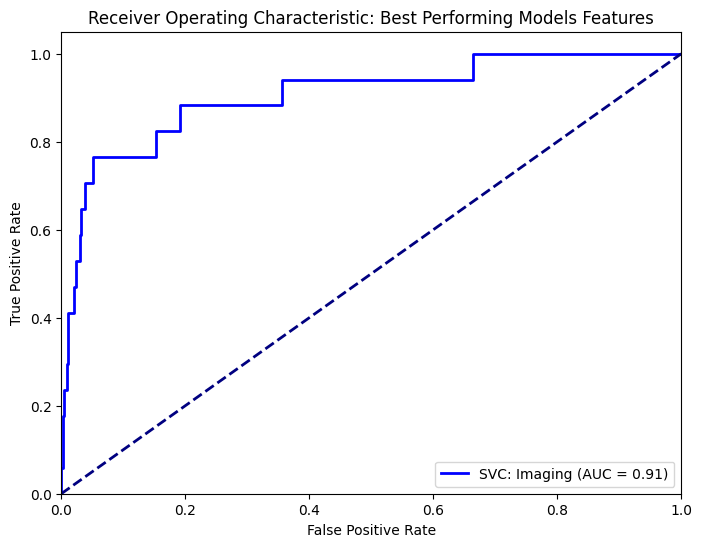

In [1276]:
# ROC Curve for IM features

models_svc_dic = {
#    'SVC: PLCO' : best_svc_model,
    'SVC: Imaging' : best_svc_model_im,
#    'SVC: Imaging + PLCO' : best_svc_plco_im
}

make_roc_curve(models_svc_dic, X_ucla, y_ucla, 'Best Performing Models')

In [ ]:
def make_pr_curve(models, X_test, y_test, chart_title):
    
    
    # Initialize dictionary to hold ROC data
    roc_data = {}

    # Calculate ROC curve and ROC area for each model
    for name, model in models.items():
        y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        roc_data[name] = (fpr, tpr, roc_auc)
        
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'green', 'red', 'orange']  # Colors for the different ROC curves

    for (name, (fpr, tpr, roc_auc)), color in zip(roc_data.items(), colors):
        plt.plot(fpr, tpr, color=color, lw=2,
                 label='{0} (AUC = {1:0.2f})'.format(name, roc_auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic: ' + chart_title + ' Features')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
    # Initialize dictionary to hold PR data
    pr_data = {}
    
    colors = ['blue', 'green', 'red', 'orange']  # Reuse colors for PR curves
    for name, model in models.items():
        y_probs = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_probs)
        pr_auc = average_precision_score(y_test, y_probs)
        pr_data[name] = (precision, recall, pr_auc)
        plt.plot(recall, precision, color=colors.pop(0), lw=2, label=f'{name} (PR AUC = {pr_auc:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves: ' + chart_title)
    plt.legend(loc="lower left")
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

    plt.show()

In [1165]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def make_pr_curve(models, X_test, y_test, chart_title):
    plt.figure(figsize=(8, 6))  # Set the figure size for the plot

    # Colors for the different PR curves, extend the list as needed
    colors = ['blue', 'green', 'red', 'orange'] 

    # Calculate Precision-Recall curve and AUPRC for each model
    for name, model in models.items():
        y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
        precision, recall, _ = precision_recall_curve(y_test, y_probs)
        pr_auc = average_precision_score(y_test, y_probs)
        plt.plot(recall, precision, color=colors.pop(0), lw=2,
                 label=f'{name} (AUPRC = {pr_auc:.2f})')

    # Add labels and title to the plot
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves: ' + chart_title + ' Features')
    plt.legend(loc="lower left")
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

    plt.show()  # Display the plot


In [1291]:
def make_mixed_pr_curve(chart_title):
    
    
    plt.figure(figsize=(8, 6))  # Set the figure size for the plot
    colors = ['blue', 'green', 'red'] 

    X_nlst = nlst_test_patients_plco_df[plco_training_features_list] 
    y_nlst = nlst_test_patients_plco_df['first_year_diagnosis']

    X_ucla = ucla_sybil_training_df[plco_training_features_list]
    y_ucla = ucla_sybil_training_df['first_year_diagnosis']


    
    y_probs = best_svc_model.predict_proba(X_ucla)[:, 1]  # Get probabilities for the positive class
    precision, recall, _ = precision_recall_curve(y_ucla, y_probs)
    pr_auc = average_precision_score(y_ucla, y_probs)
    plt.plot(recall, precision, color=colors.pop(0), lw=2,
             label=f'SVC: PLCO (AUPRC = {pr_auc:.2f})')
    
    
    X_nlst = flat_feature_vector_nlst_df
    y_nlst = nlst_sybil_training_df['first_year_diagnosis']

    X_ucla = flat_feature_vector_df
    y_ucla = ucla_sybil_training_df['first_year_diagnosis']
      
    
    y_probs = best_svc_model_im.predict_proba(X_ucla)[:, 1]  # Get probabilities for the positive class
    precision, recall, _ = precision_recall_curve(y_ucla, y_probs)
    pr_auc = average_precision_score(y_ucla, y_probs)
    plt.plot(recall, precision, color=colors.pop(0), lw=2,
             label=f'SVC: Imaging (AUPRC = {pr_auc:.2f})')   
    
    
    
    
    X_nlst = nlst_sybil_training_df[plco_training_features_list] 
    X_nlst = pd.concat([X_nlst, flat_feature_vector_nlst_df], axis=1)
    X_nlst.columns = [str(col) for col in X_nlst.columns]

    y_nlst = nlst_sybil_training_df['first_year_diagnosis']

    X_ucla = ucla_sybil_training_df[plco_training_features_list]
    X_ucla = pd.concat([X_ucla, flat_feature_vector_df], axis=1)
    X_ucla.columns = [str(col) for col in X_ucla.columns]

    y_ucla = ucla_sybil_training_df['first_year_diagnosis']

    

    y_probs = best_svc_plco_im.predict_proba(X_ucla)[:, 1]  # Get probabilities for the positive class
    precision, recall, _ = precision_recall_curve(y_ucla, y_probs)
    pr_auc = average_precision_score(y_ucla, y_probs)
    plt.plot(recall, precision, color=colors.pop(0), lw=2,
             label=f'SVC: Imaging + PLCO (AUPRC = {pr_auc:.2f})')   
    
        
    # Add labels and title to the plot
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves: ' + chart_title)
    plt.legend(loc="lower left")
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

    plt.show()  # Display the plot

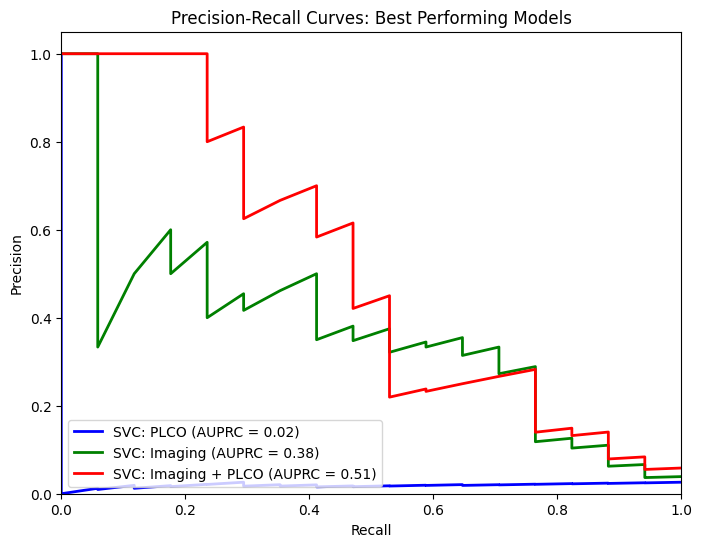

In [1292]:
make_mixed_pr_curve('Best Performing Models')

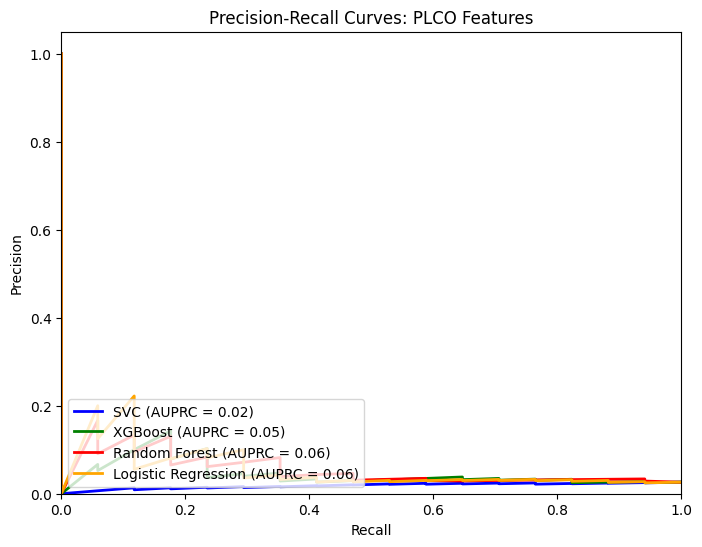

In [1166]:
# Precision-Recall Curve for PLCO features

models_dic = {
    'SVC' : best_svc_model,
    'XGBoost' : best_xgboost_model,
    'Random Forest' : best_rand_for_model,
    'Logistic Regression' : best_log_reg_model
}

make_pr_curve(models_dic, X_ucla, y_ucla, 'PLCO')

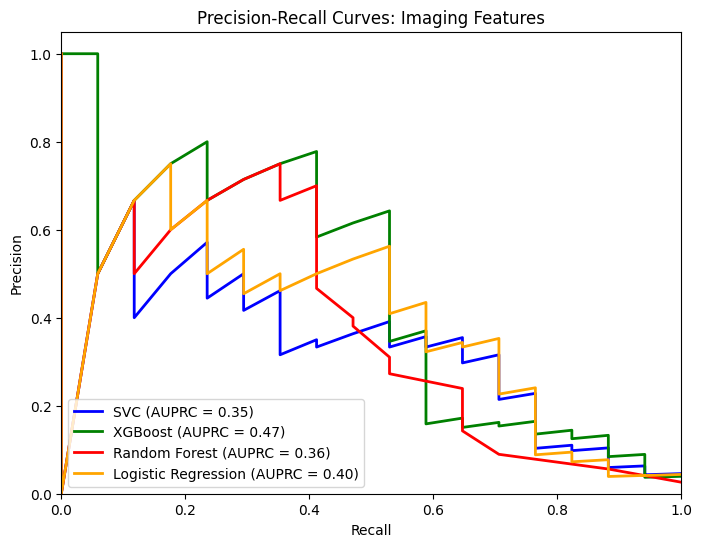

In [1167]:
# Precision-Recall Curve for IM features

models_im_dic = {
    'SVC' : best_svc_model_im,
    'XGBoost' : best_xgboost_model_im,
    'Random Forest' : best_rand_for_model_im,
    'Logistic Regression' : best_log_reg_model_im
}

make_pr_curve(models_im_dic, flat_feature_vector_df, y_ucla, 'Imaging')

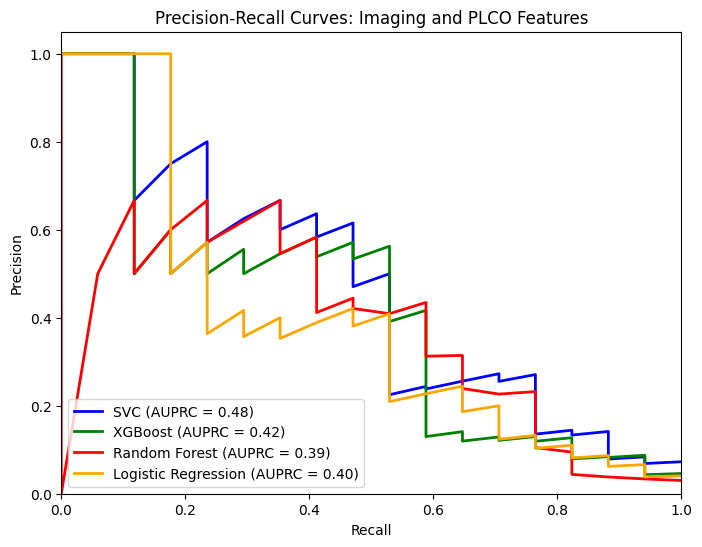

In [1168]:
# Precision-Recall Curve for IM + PLCO features

models_im_plco_dic = {
    'SVC' : best_svc_plco_im,
    'XGBoost' : best_xgboost_plco_im,
    'Random Forest' : best_rand_for_plco_im,
    'Logistic Regression' : best_log_reg_plco_im
}

make_pr_curve(models_im_plco_dic, X_ucla, y_ucla, 'Imaging and PLCO')